In [49]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
from scipy.linalg import eigh
import scipy
import scipy.stats
from optim import *
#tqdm=aux

Base coefficient generators yield parameters as in:

$$
P_{t+1}(\lambda)=a_tP_t(\lambda)+b_t\lambda P_t(\lambda)+c_tP_{t-1}(\lambda)
$$

Let $\xi$ be a linear map between the domains, i.e. $\xi:[0,L]\rightarrow[-1,1]=ax+b=\frac{L}{2}(x+1)$. Then if $P_t(x)=\tilde{P}_t(x)$, it's recurrence coefficients follow:  
$a_t=\tilde{a}_t+b\tilde{b}_t$ $b_t=a\tilde{b}_t$





100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 626.63it/s]

-3.5 [1.27302955] -0.5208333333333334
-2.46 [1.06934482] -0.735
-2.1904761904761907 [1.01842364] -0.8035714285714286
-2.083333333333333 [1.0002375] -0.8402777777777778
-2.0318181818181817 [0.99296305] -0.8642045454545455
waloo
-3.5 [1.27302955] -0.5208333333333334
-2.46 [1.06934482] -0.735
-2.1904761904761907 [1.01842364] -0.8035714285714286
-2.0833333333333335 [1.0002375] -0.8402777777777778
-2.0318181818181817 [0.99296305] -0.8642045454545455


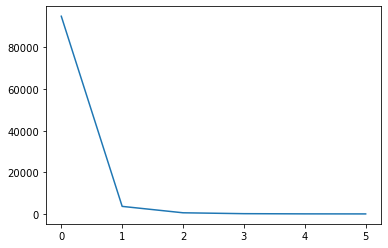

In [48]:



def fom(f,gen,niter=200):
    x1=x=f.x0
    log=Log()
    log(f,x)
     
    for _ in range(niter):
        a,b,_=next(gen)
        aux=x
        x=x+(a-1)*(x-x1)+b*f.grad(x)
        x1=aux
        
        log(f,x)
        
    return log,x

def jacobi_basegen(alpha,beta):

    n=0
    while True:
        
        at=(alpha**2-beta**2)*(2*n+alpha+beta+1)/ \
            (2*(n+1)*(n+alpha+beta+1)*(2*n+alpha+beta))
        bt=(2*n+alpha+beta+1)*(2*n+alpha+beta+2)/ \
            (2*(n+1)*(n+alpha+beta+1))
        ct=-(n+alpha)*(n+beta)*(2*n+alpha+beta+2)/ \
            ((n+1)*(n+alpha+beta+1)*(2*n+alpha+beta))
        
        
        yield at,bt,ct
        n+=1

def residual_wrapgen(gen):
    delta=0
    while True:
        alpha,beta,gamma=next(gen)
        delta=1/(alpha+gamma*delta)
        yield alpha*delta,delta*beta,1-alpha*delta
        
def shift_wrapgen(gen,a=2,b=2):
    while True:
        alpha,beta,gamma=next(gen)
        alpha=alpha+b*beta
        beta=a*beta

        yield alpha,beta,gamma
    
    

f=RandomQuadratic()
gen=residual_wrapgen(shift_wrapgen(jacobi_basegen(1/2,5/2),2/f.L,-1))
log,_=fom(f,gen,niter=5)
lo,_=jacobi_momentum(f,b=2,L=f.L,niter=5)
plt.plot(log['f'])

In [7]:
n

600

In [8]:
f=RandomQuadratic()
n=len(f.A)
evs,_=np.linalg.eigh(f.A)
mp = lambda x : 1/2/np.pi*np.sqrt((4-x)/x)


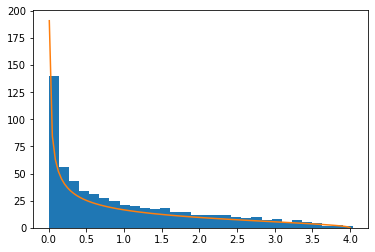

In [21]:
t=np.linspace(1e-2,4,100)

plt.hist(evs,30)
plt.plot(t,mp(t)*60)

## $\beta`$ distribution

In [55]:
from scipy.stats import betaprime,gengamma,beta



In [44]:
f= FeaturesQuadratic(nsample,train_y)
evs=eigh(f.A,eigvals_only=True)

In [56]:
def fit_nll(distr,evs):
    args=distr.fit(evs)
    return args,-np.mean(np.log(distr(*args).pdf(evs)))

_,v1=fit_nll(betaprime,evs)
_,v2=fit_nll(beta,evs)
print(v1,v2)

-2.1284449246267214 -1.476343987392058


C:\Users\leona\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\leona\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


# $\beta$ stability

In [ ]:
def jm_decorator(b=2):
    def  aux(*args,**kwargs):
        return jacobi_momentum(*args,b=b,**kwargs)
    return aux
l_list=list(range(2,50,5))
methods,tags=[jm_decorator(l) for l in l_list],['jacobi l='+str(l) for l in l_list]
logs=[[] for _ in range(len(methods))]
for _ in range(5):
    for m,l in zip(methods,logs):
        f= RandomQuadratic(r=1,)
        l.append(m(f,L=f.L)[0].to_numpy()[0])
logs=[np.stack(l) for l in logs]

## Beta Distributions

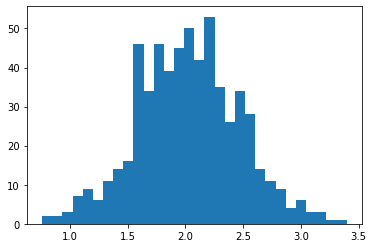

In [6]:
f=BetaQuadratic(a=10,b=10)
f.plot()

In [ ]:
##Let's check if the performance of the Jacobi method is stable wrt the behaviour of the distribution near the biggest eigenvalue

mp_logs=[]
beta_logs=[]

for _ in range(10):
    f=BetaQuadratic(b=0.6)
    beta_logs.append(jacobi_momentum(f,L=f.L)[0].to_numpy()[0])
    mp_logs.append(jacobi_momentum(f,L=f.L)[0].to_numpy()[0])
mp_logs=np.stack(mp_logs)
beta_logs=np.stack(beta_logs)


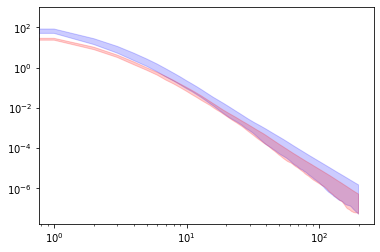

In [57]:
log_idx=0

plt.fill_between(np.arange(beta_logs.shape[-1]),beta_logs.min(0)[log_idx],beta_logs.max(0)[log_idx],alpha=0.2,color='b')
#plt.plot(mp_logs.mean(0)[log_idx])
plt.fill_between(np.arange(mp_logs.shape[-1]),mp_logs.min(0)[log_idx],mp_logs.max(0)[log_idx],alpha=0.2,color='r')
plt.yscale('log')
plt.xscale('log')

In [ ]:
##Let's check if the performance of the Jacobi method is stable wrt the behaviour of the distribution near the biggest eigenvalue

mp_logs=[] ##jacobi
beta_logs=[] ##nesterov

for _ in range(10):
    f=BetaQuadratic(b=0.6)
    beta_logs.append(nesterov(f,L=f.L)[0].to_numpy()[0])
    mp_logs.append(jacobi_momentum(f,b=20,L=f.L)[0].to_numpy()[0])
mp_logs=np.stack(mp_logs)
beta_logs=np.stack(beta_logs)


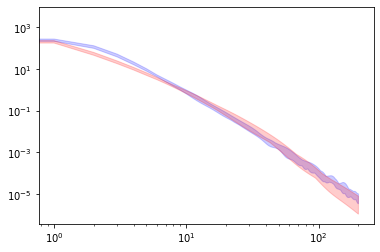

In [13]:
log_idx=0

plt.fill_between(np.arange(beta_logs.shape[-1]),beta_logs.min(0)[log_idx],beta_logs.max(0)[log_idx],alpha=0.2,color='b')
#plt.plot(mp_logs.mean(0)[log_idx])
plt.fill_between(np.arange(mp_logs.shape[-1]),mp_logs.min(0)[log_idx],mp_logs.max(0)[log_idx],alpha=0.2,color='r')
plt.yscale('log')
plt.xscale('log')

## MP distribution

In [ ]:
## jacobi stability


def jm_decorator(b=2):
    def  aux(*args,**kwargs):
        return jacobi_momentum(*args,b=b,**kwargs)
    return aux
l_list=list(range(2,50,5))
methods,tags=[jm_decorator(l) for l in l_list],['jacobi l='+str(l) for l in l_list]
logs=[[] for _ in range(len(methods))]
for _ in range(5):
    for m,l in zip(methods,logs):
        f= RandomQuadratic(r=1,)
        l.append(m(f,L=f.L)[0].to_numpy()[0])
logs=[np.stack(l) for l in logs]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


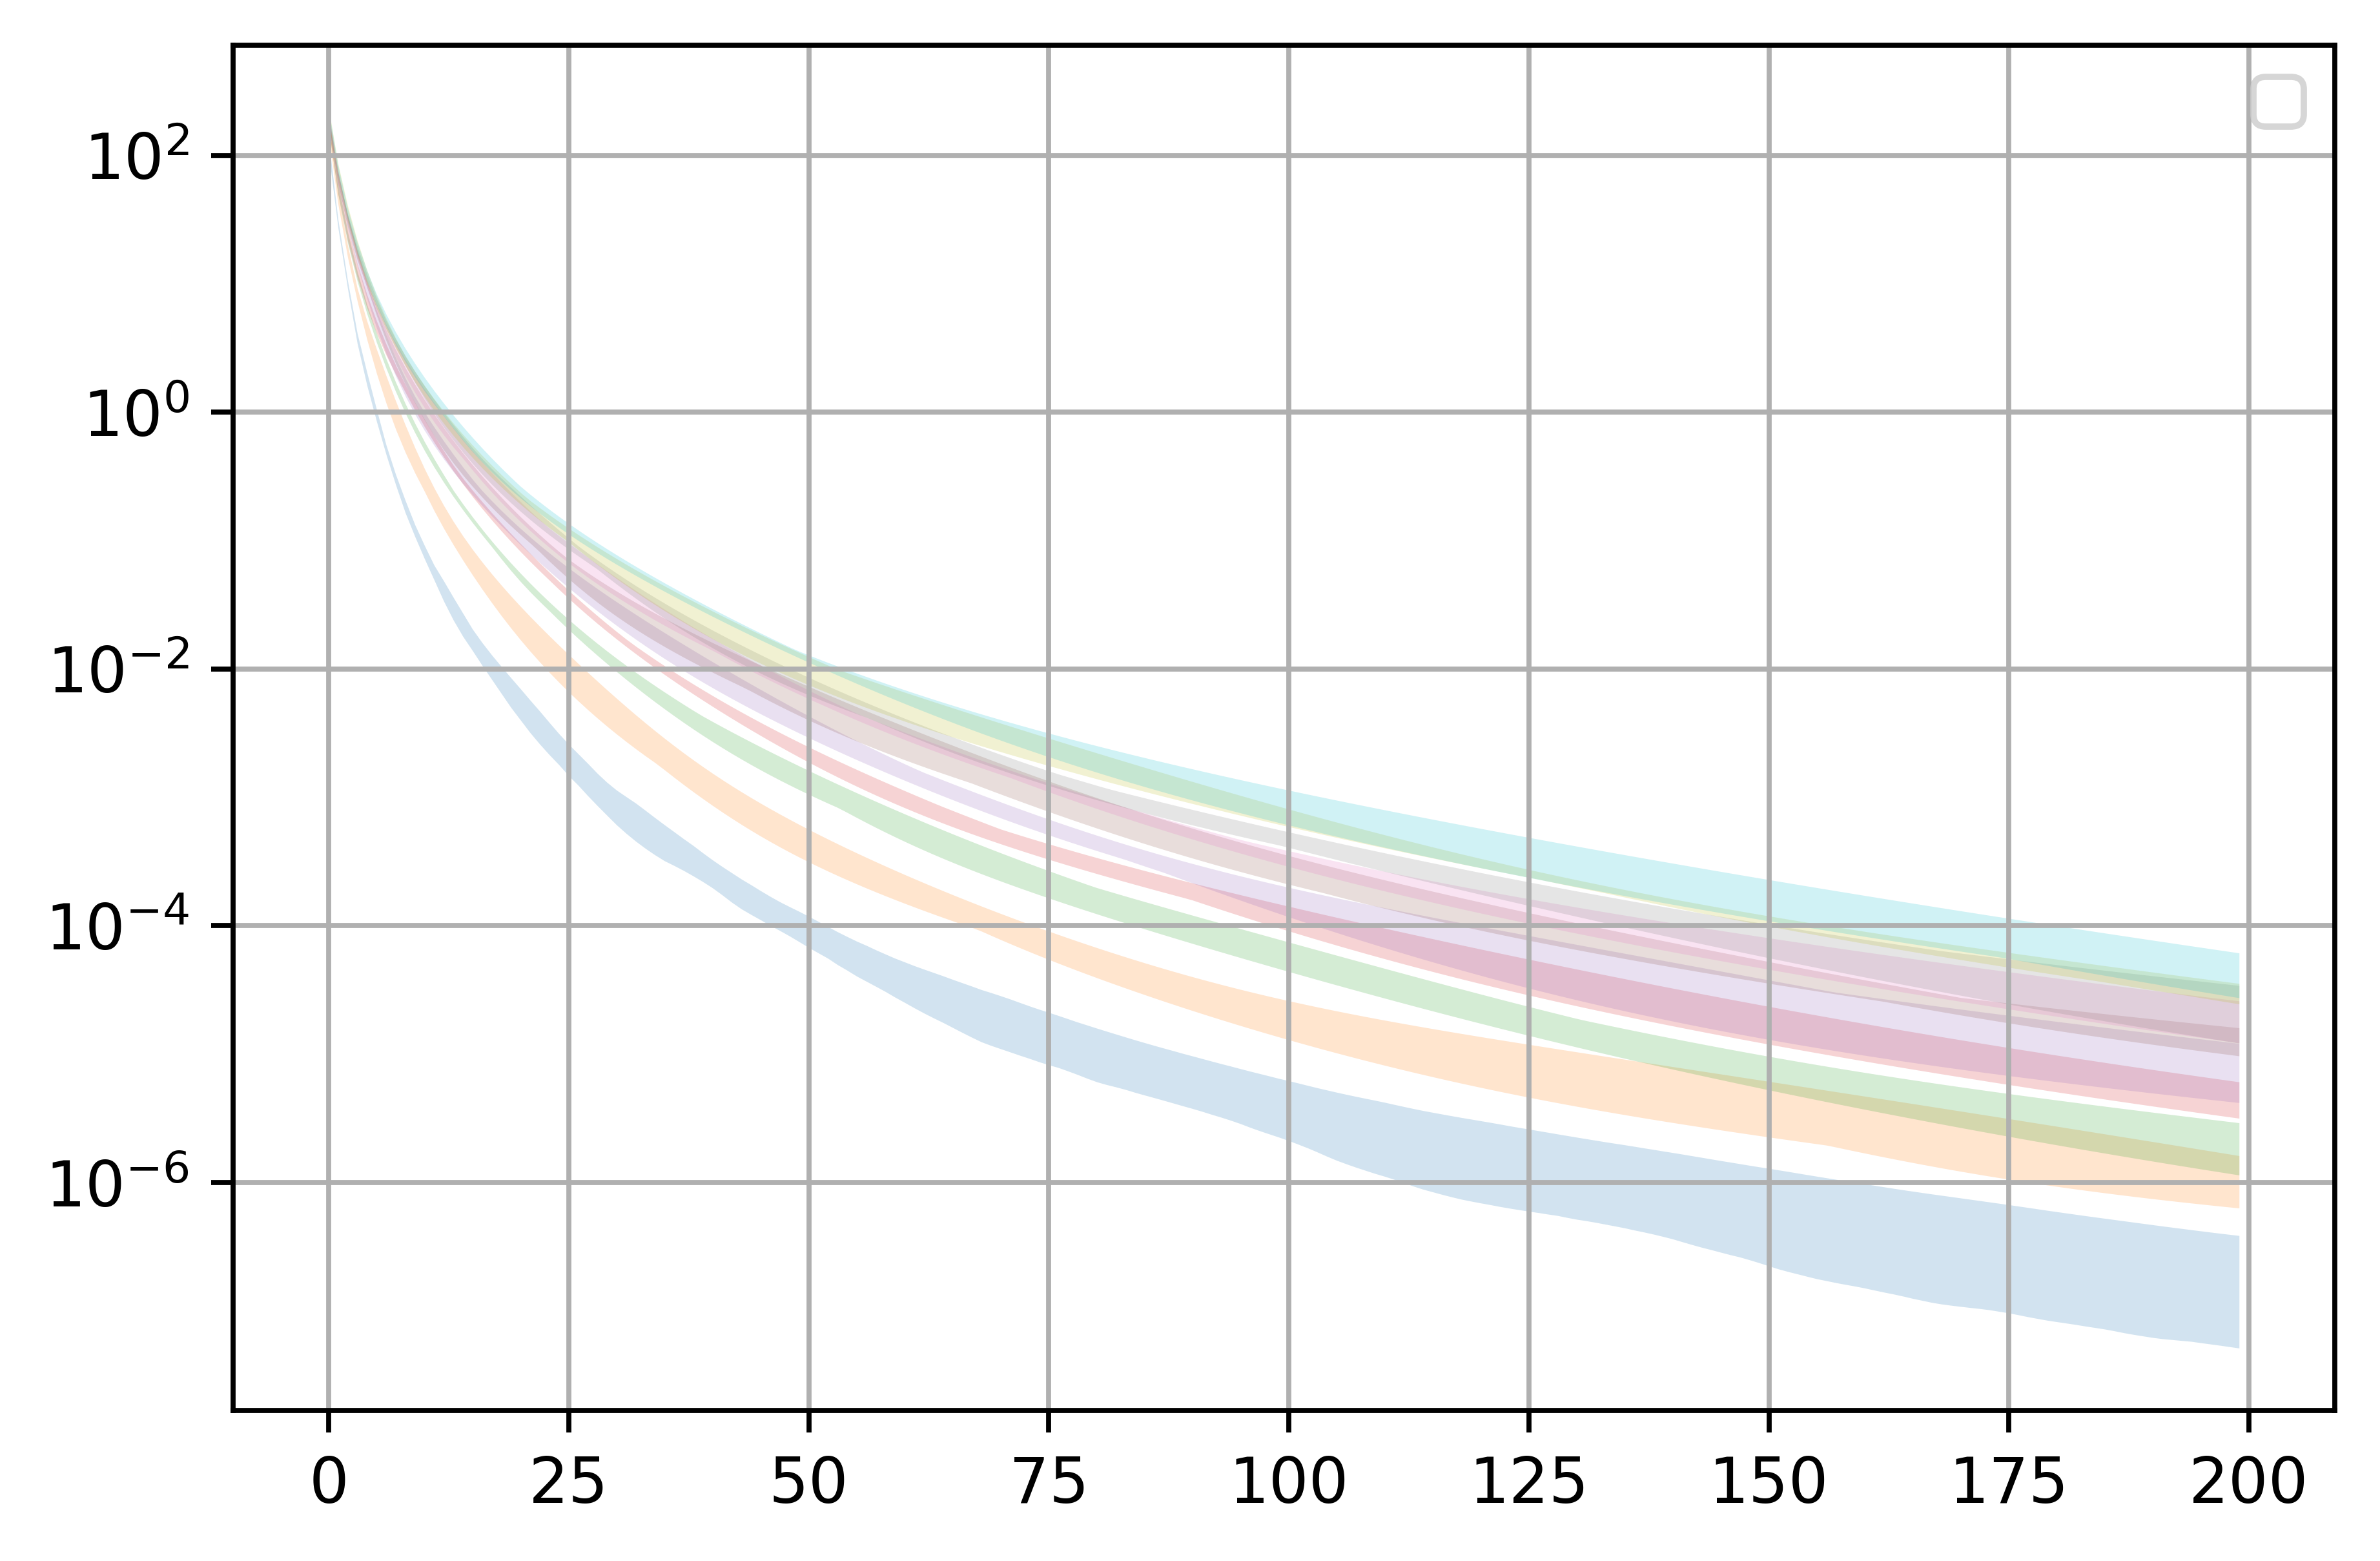

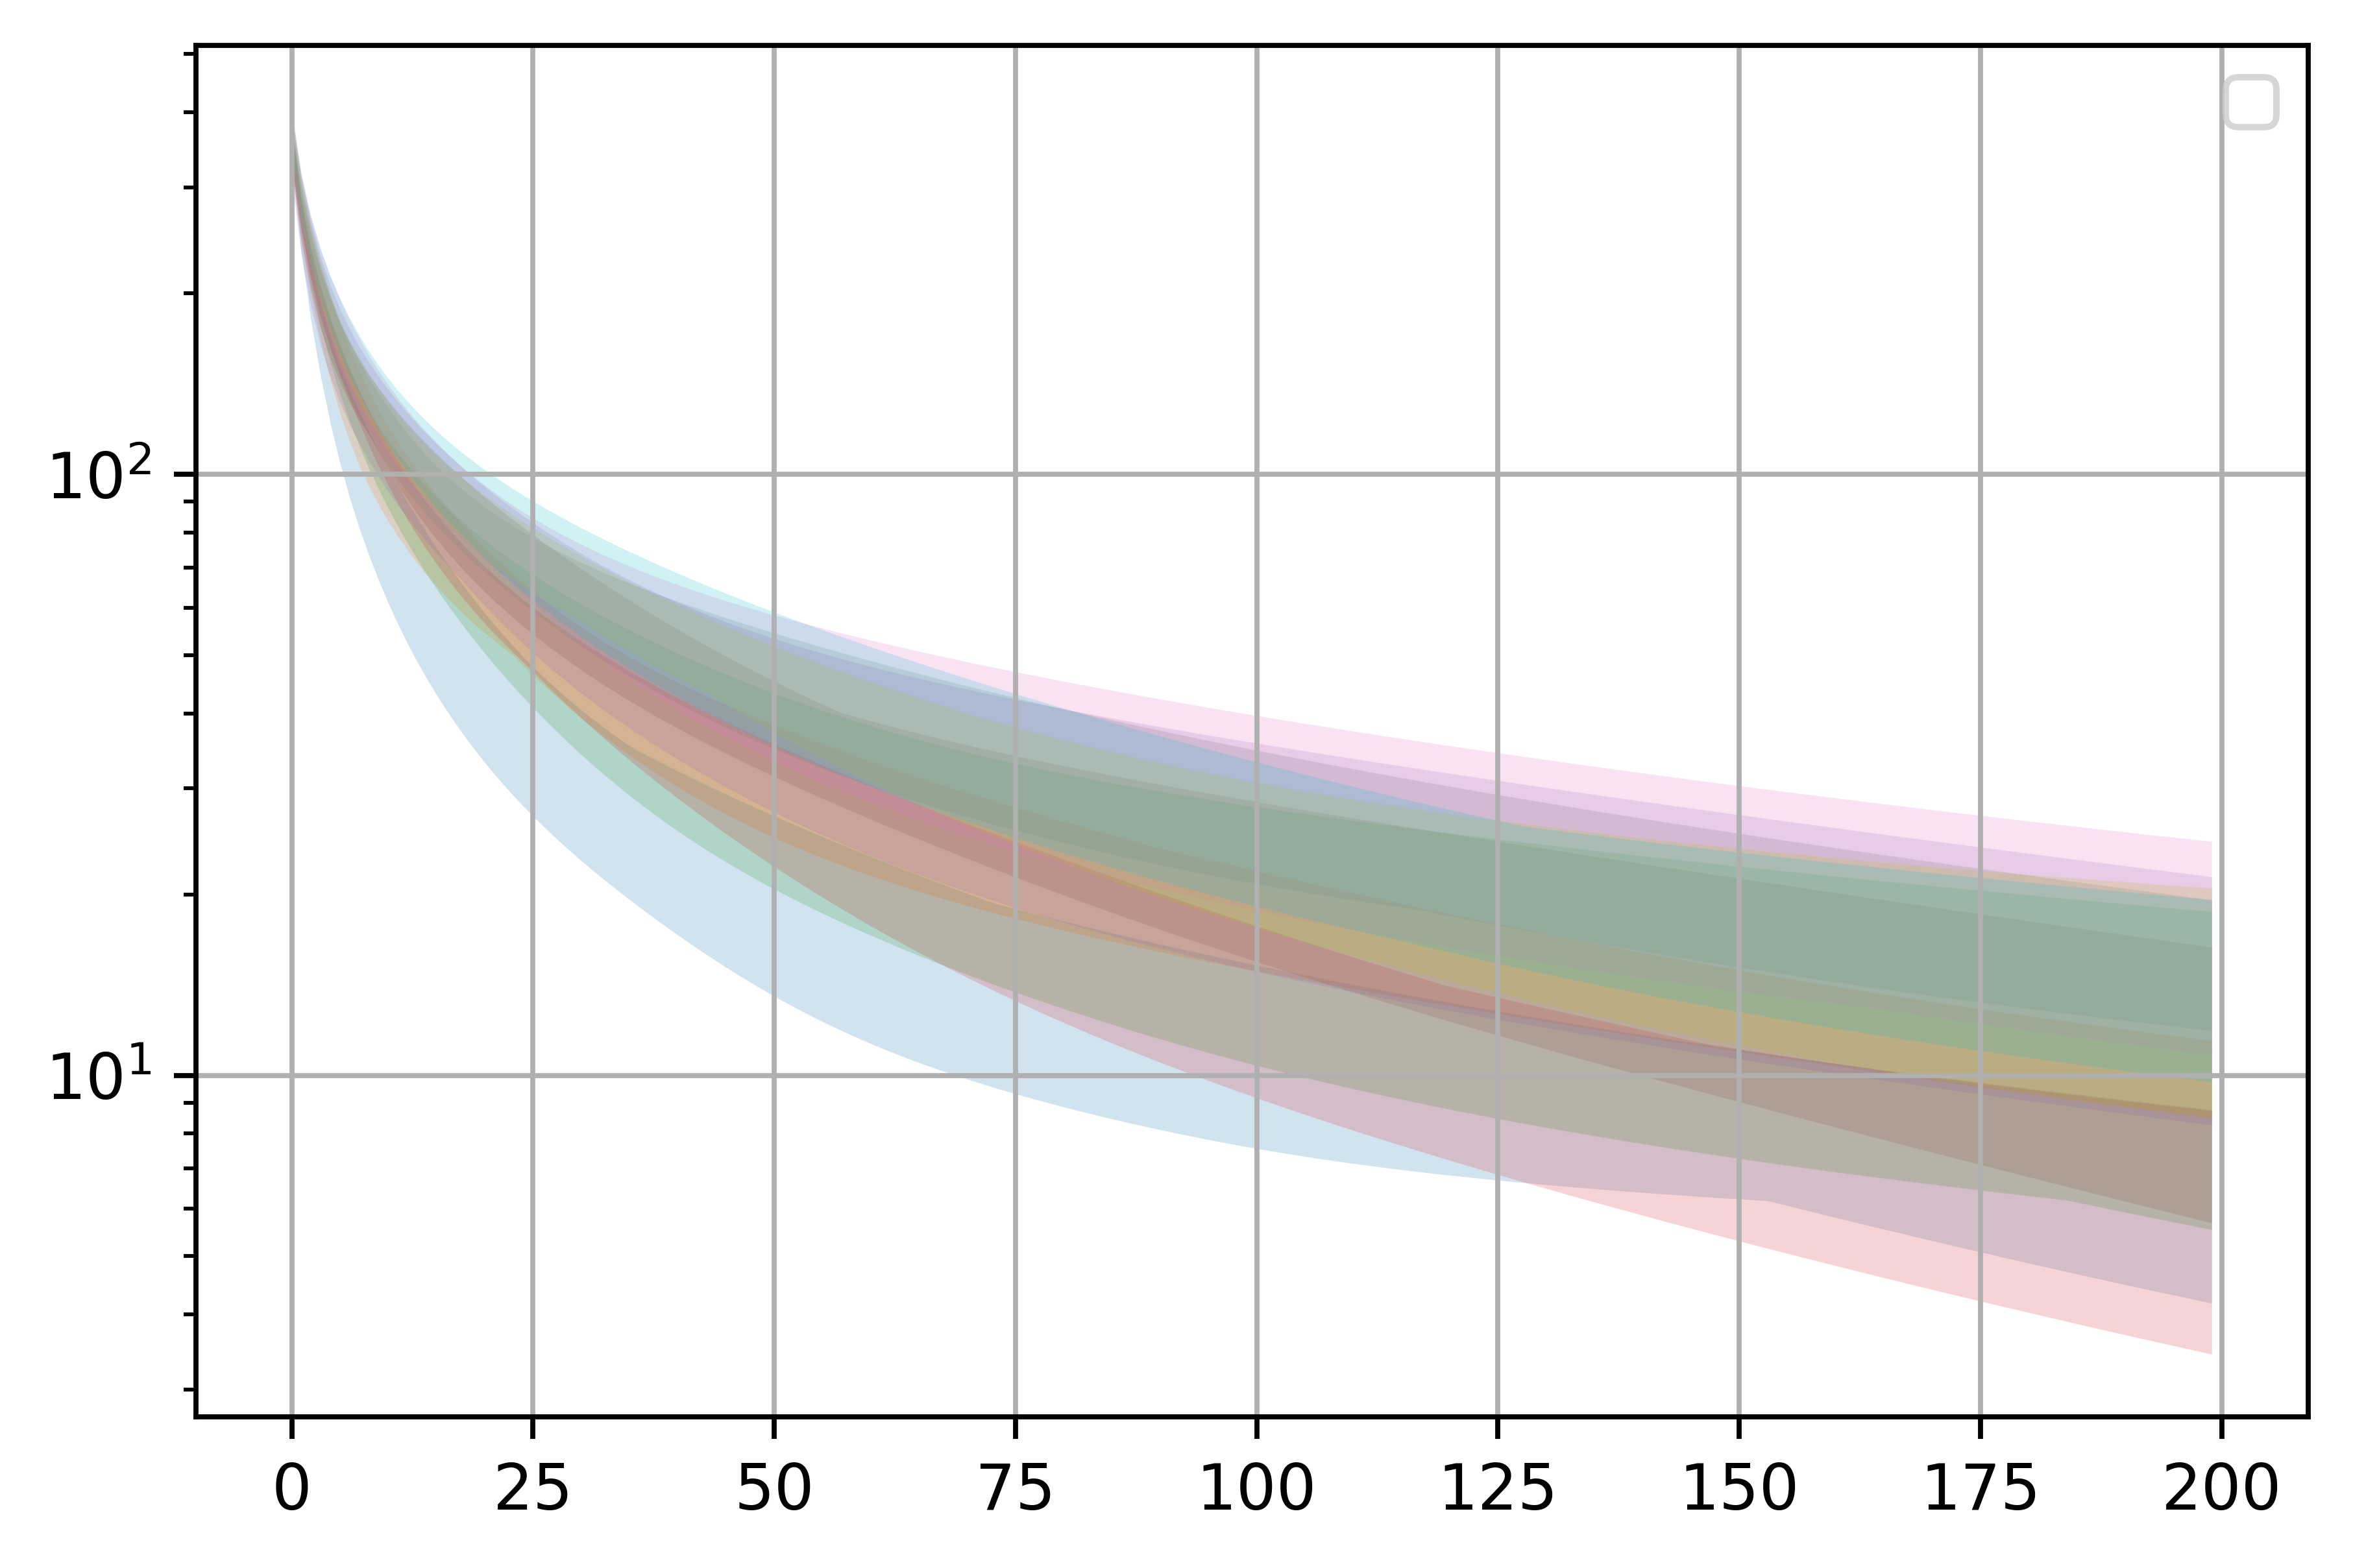

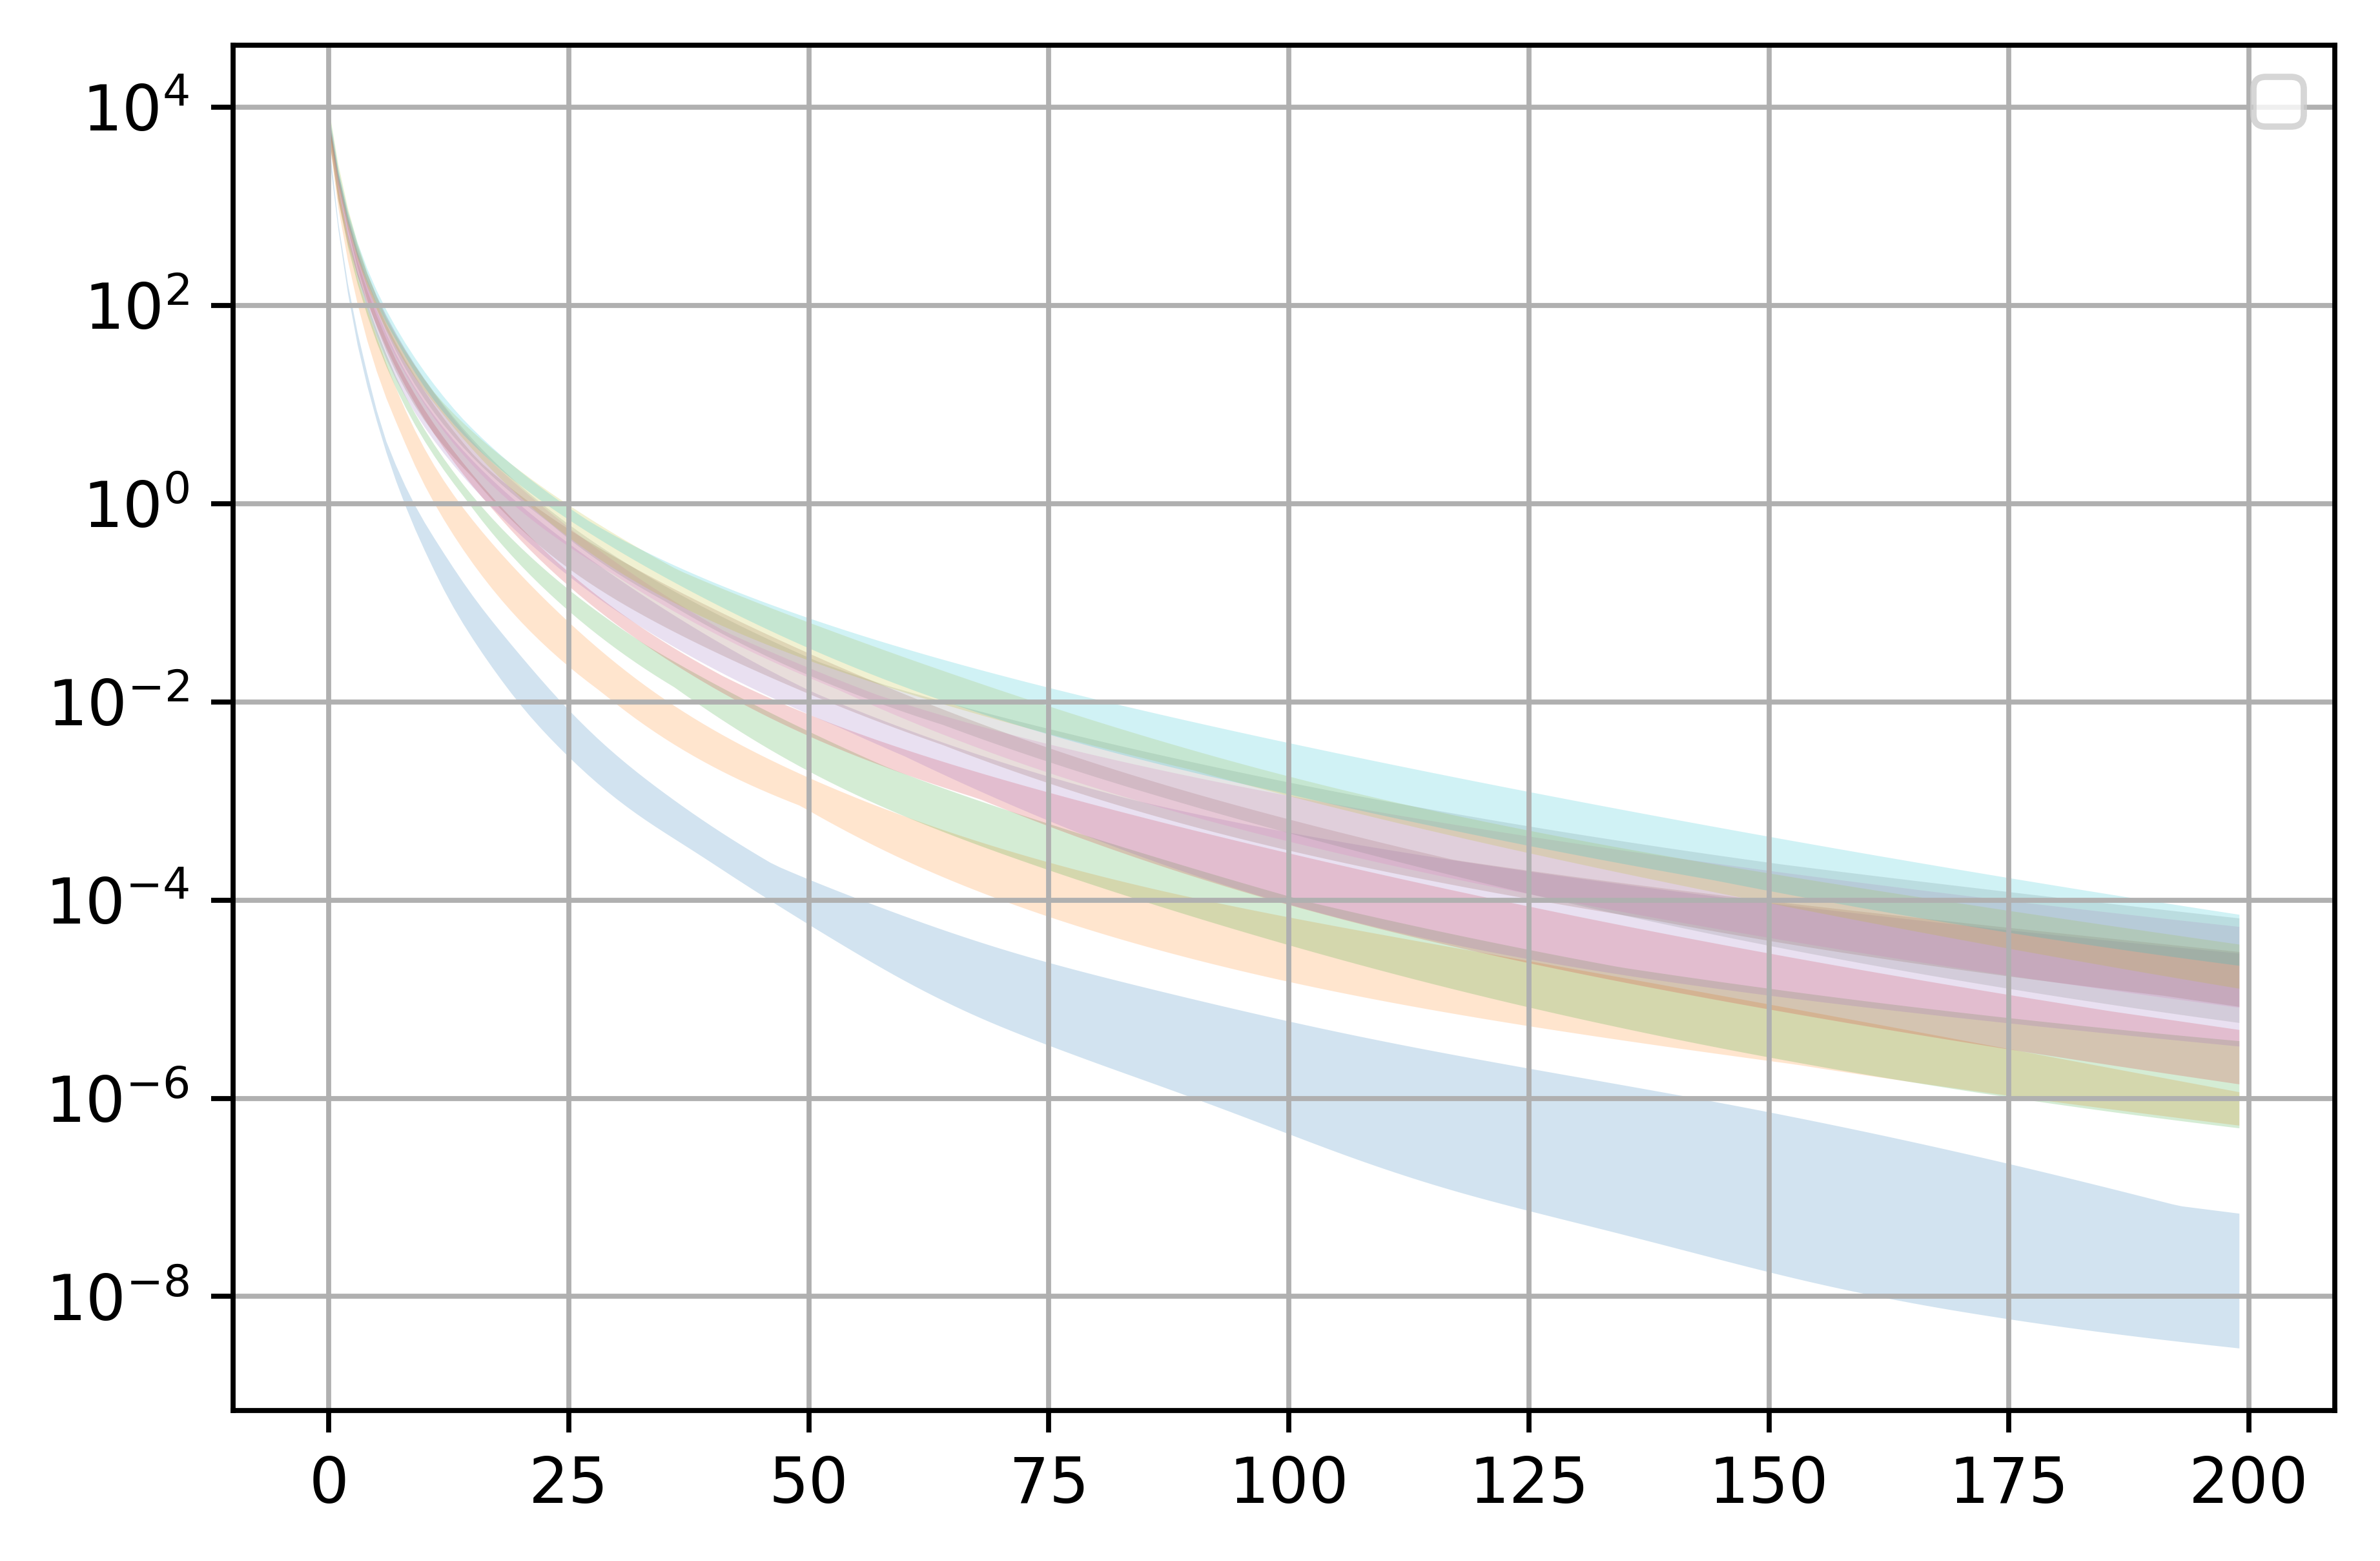

In [6]:
for log_idx in range(3):

    plt.figure(dpi=700)

    for a, tag in zip(logs,tags):
        #a=np.log10(a)
        plt.fill_between(np.arange(a.shape[-1]),a.min(0)[log_idx],a.max(0)[log_idx],alpha=0.2)
        #plt.plot(m[log_idx],label=tag)
    plt.yscale('log')
    plt.grid()
    plt.legend()

In [ ]:
def jm_decorator(b=2):
    def  aux(*args,**kwargs):
        return jacobi_momentum(*args,b=b,**kwargs)
    return aux

methods,tags=[jm_decorator(0),jm_decorator(1),jm_decorator(2),cg,gd,nesterov],['jacobi $a=0$','jacobi $a=1$','jacobi $a=2$','cg','gd','nesterov']
logs=[[] for _ in range(len(methods))]
for _ in range(20):
    for m,l in zip(methods,logs):
        f= RandomQuadratic(r=1,)
        l.append(m(f,L=f.L)[0].to_numpy()[0])
logs=[np.stack(l) for l in logs]


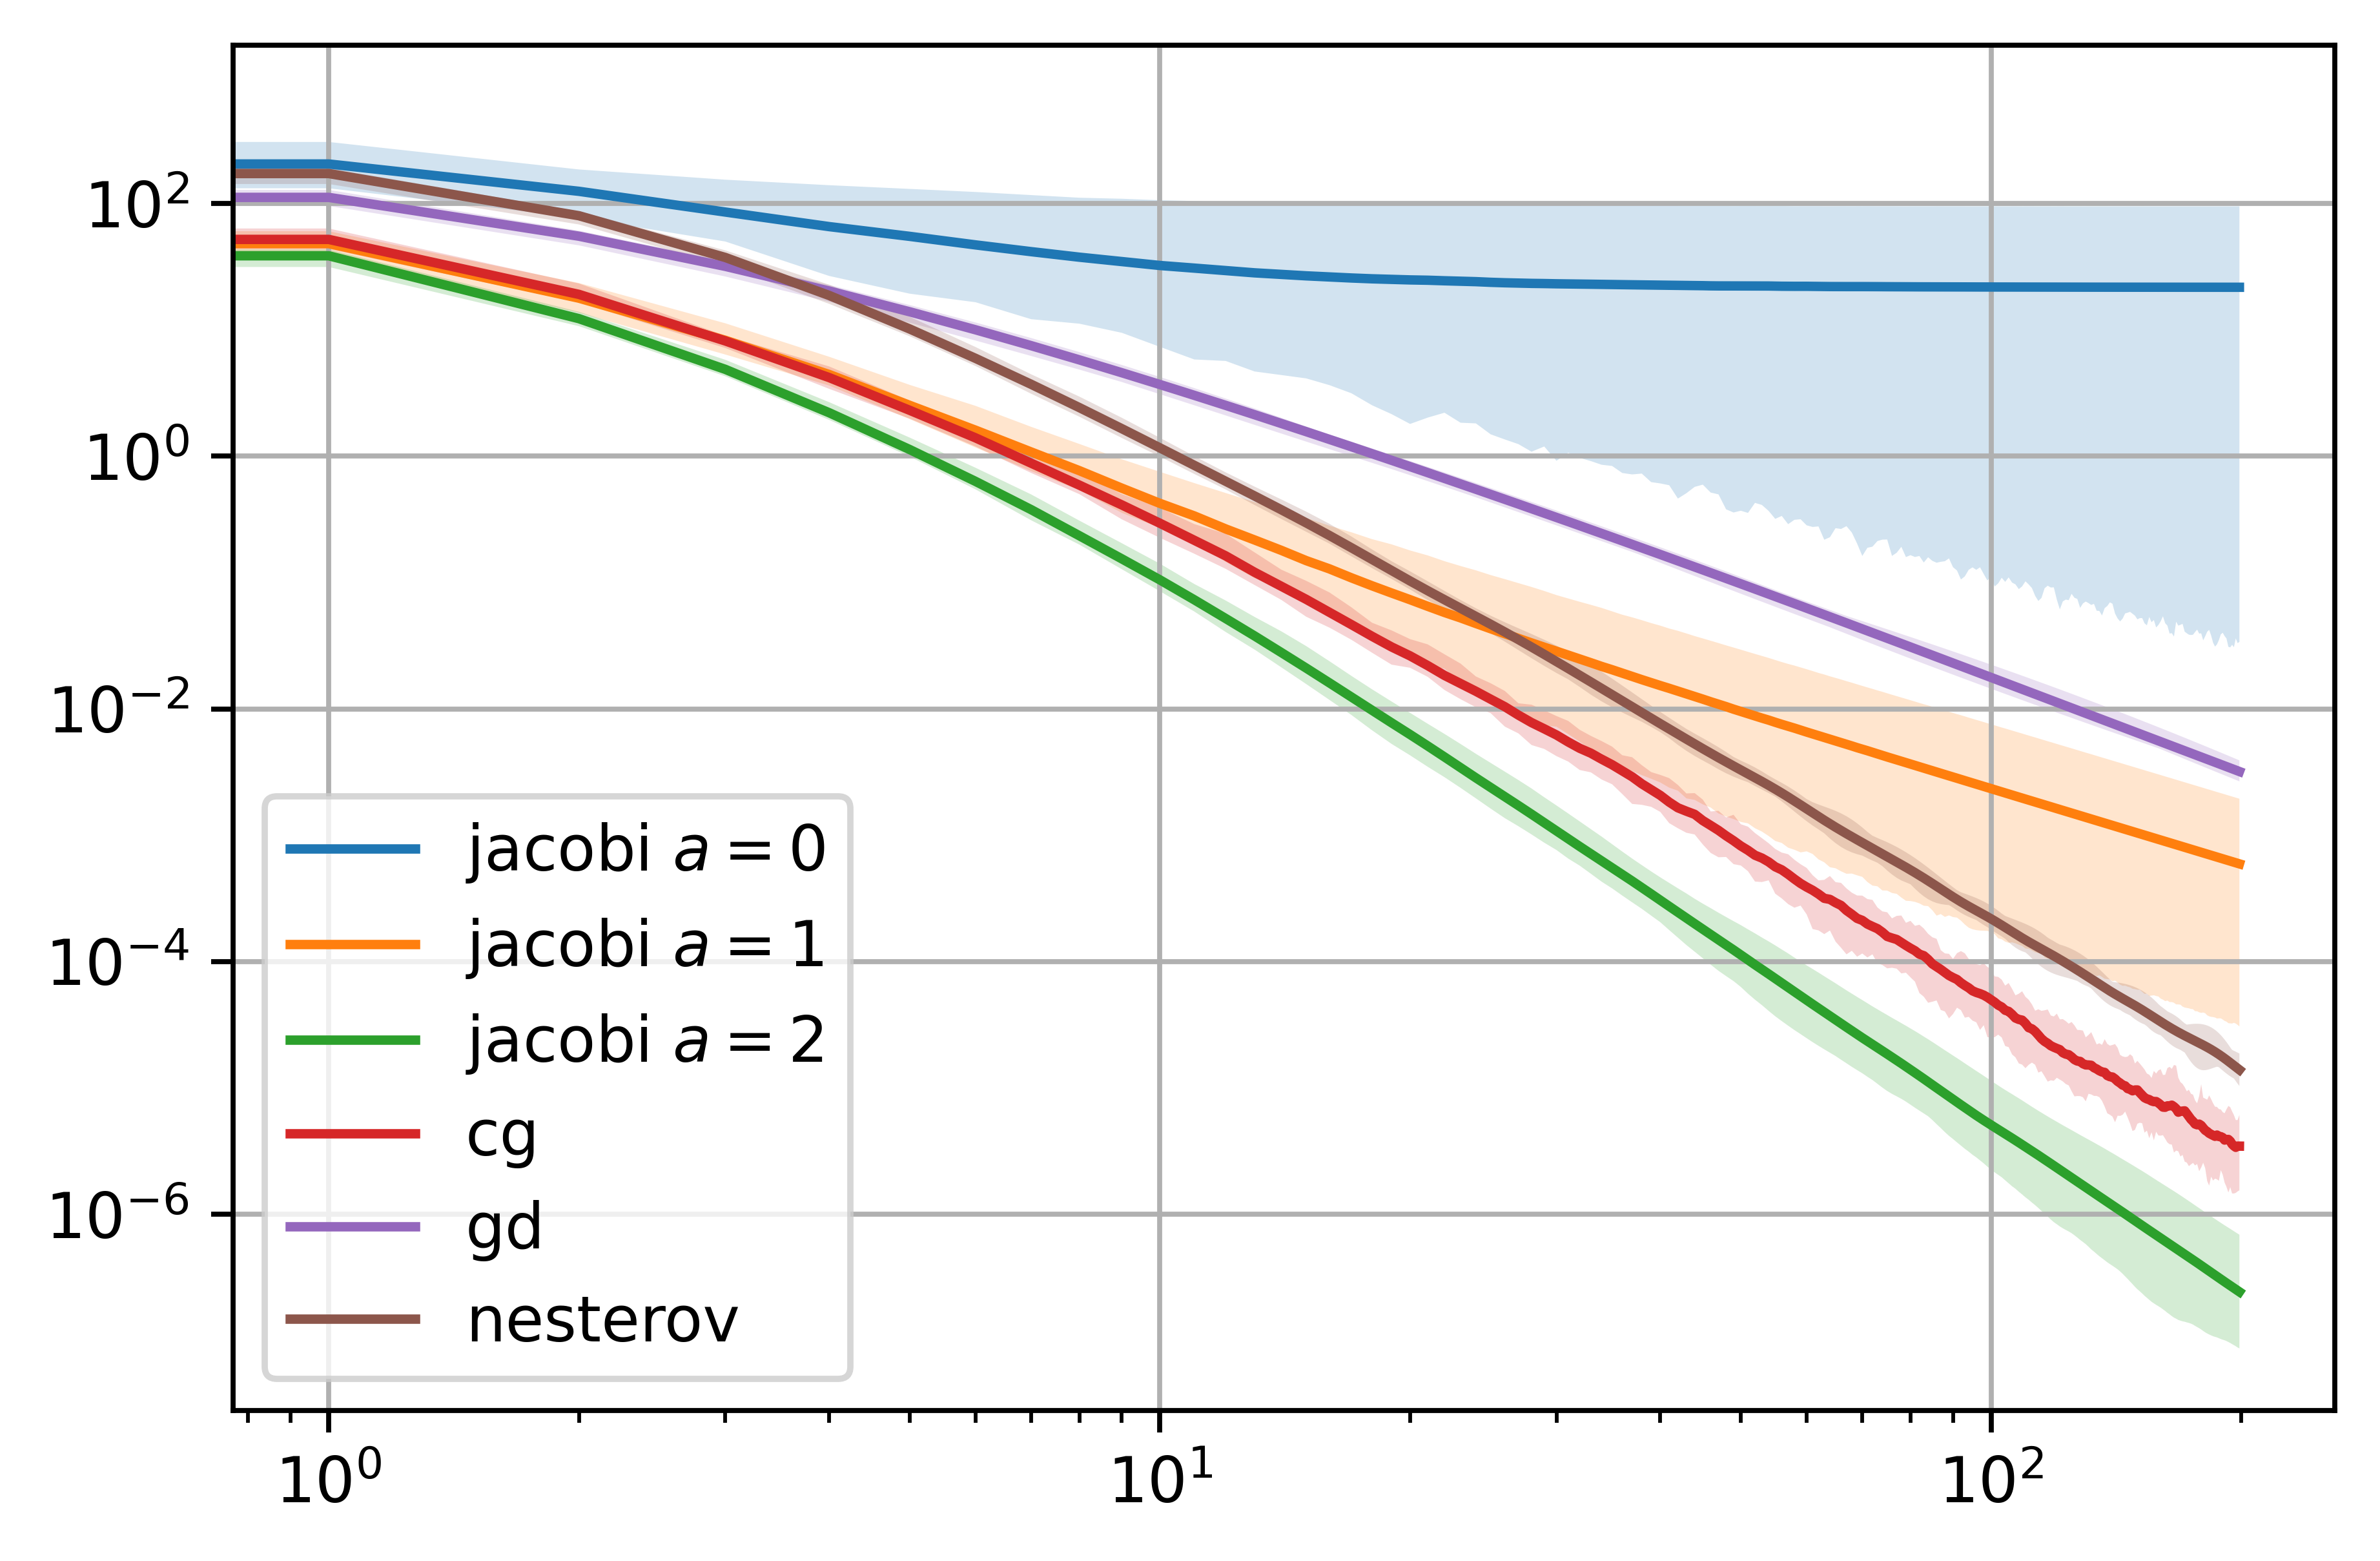

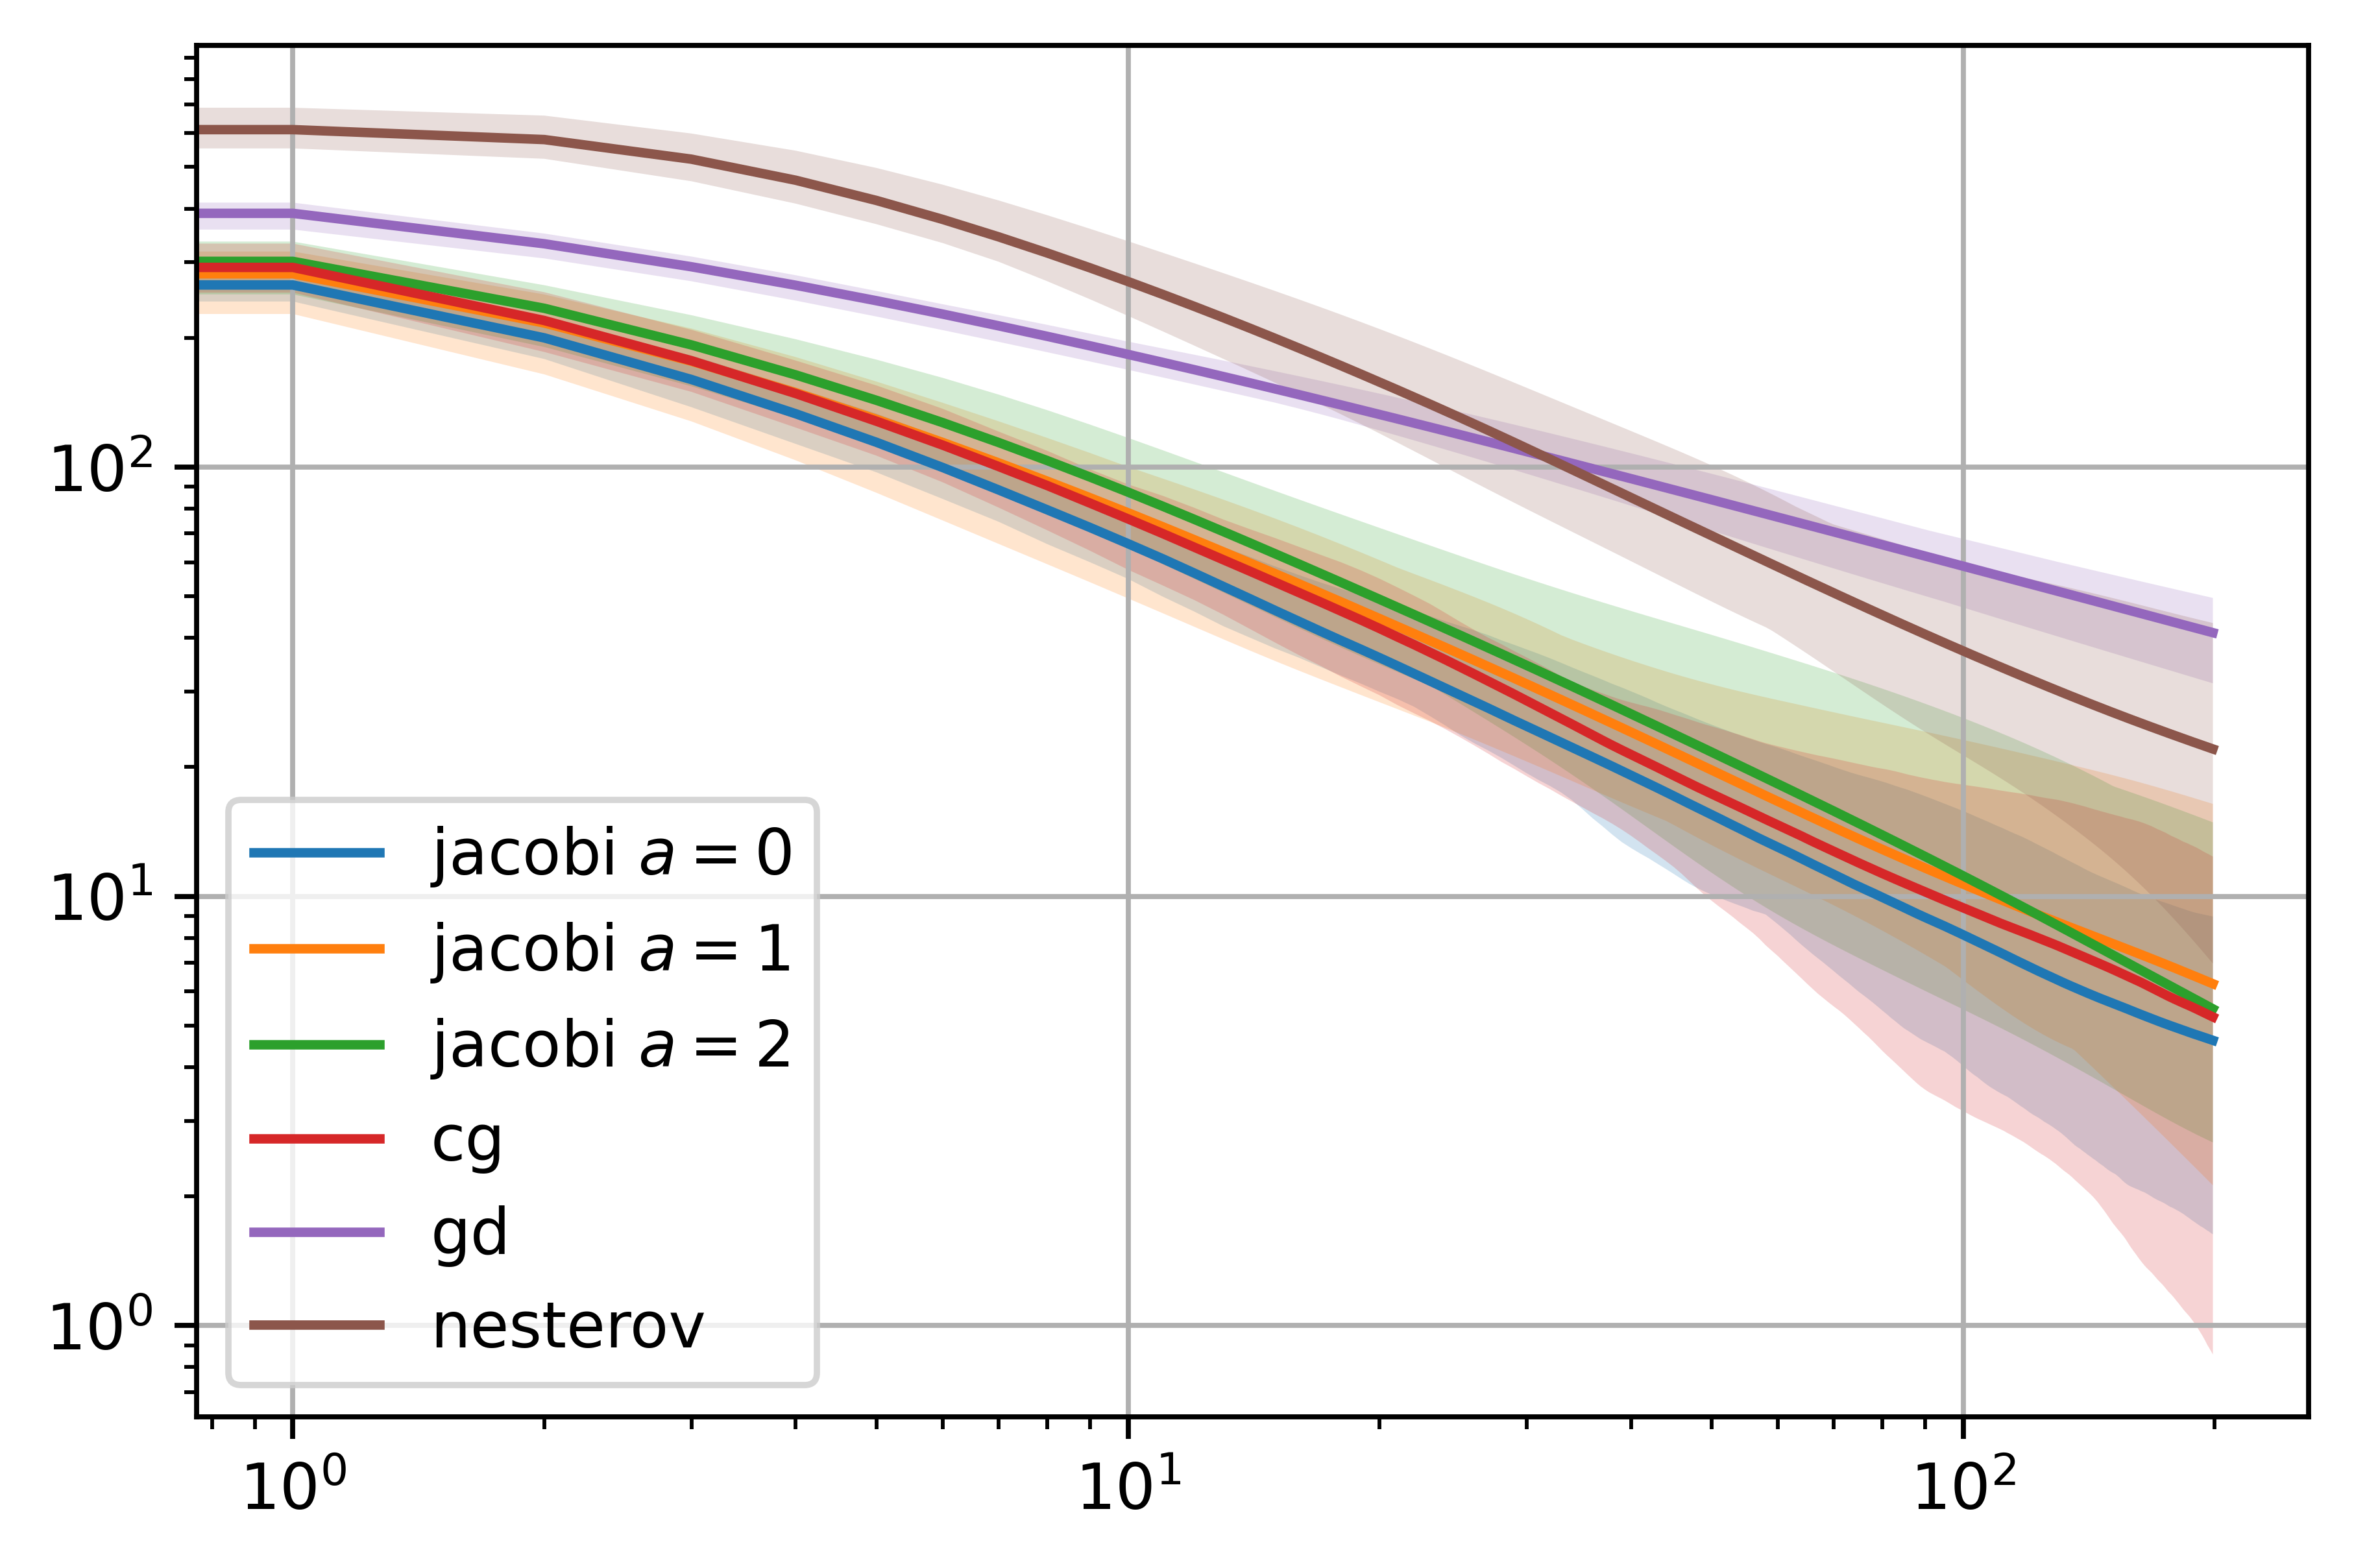

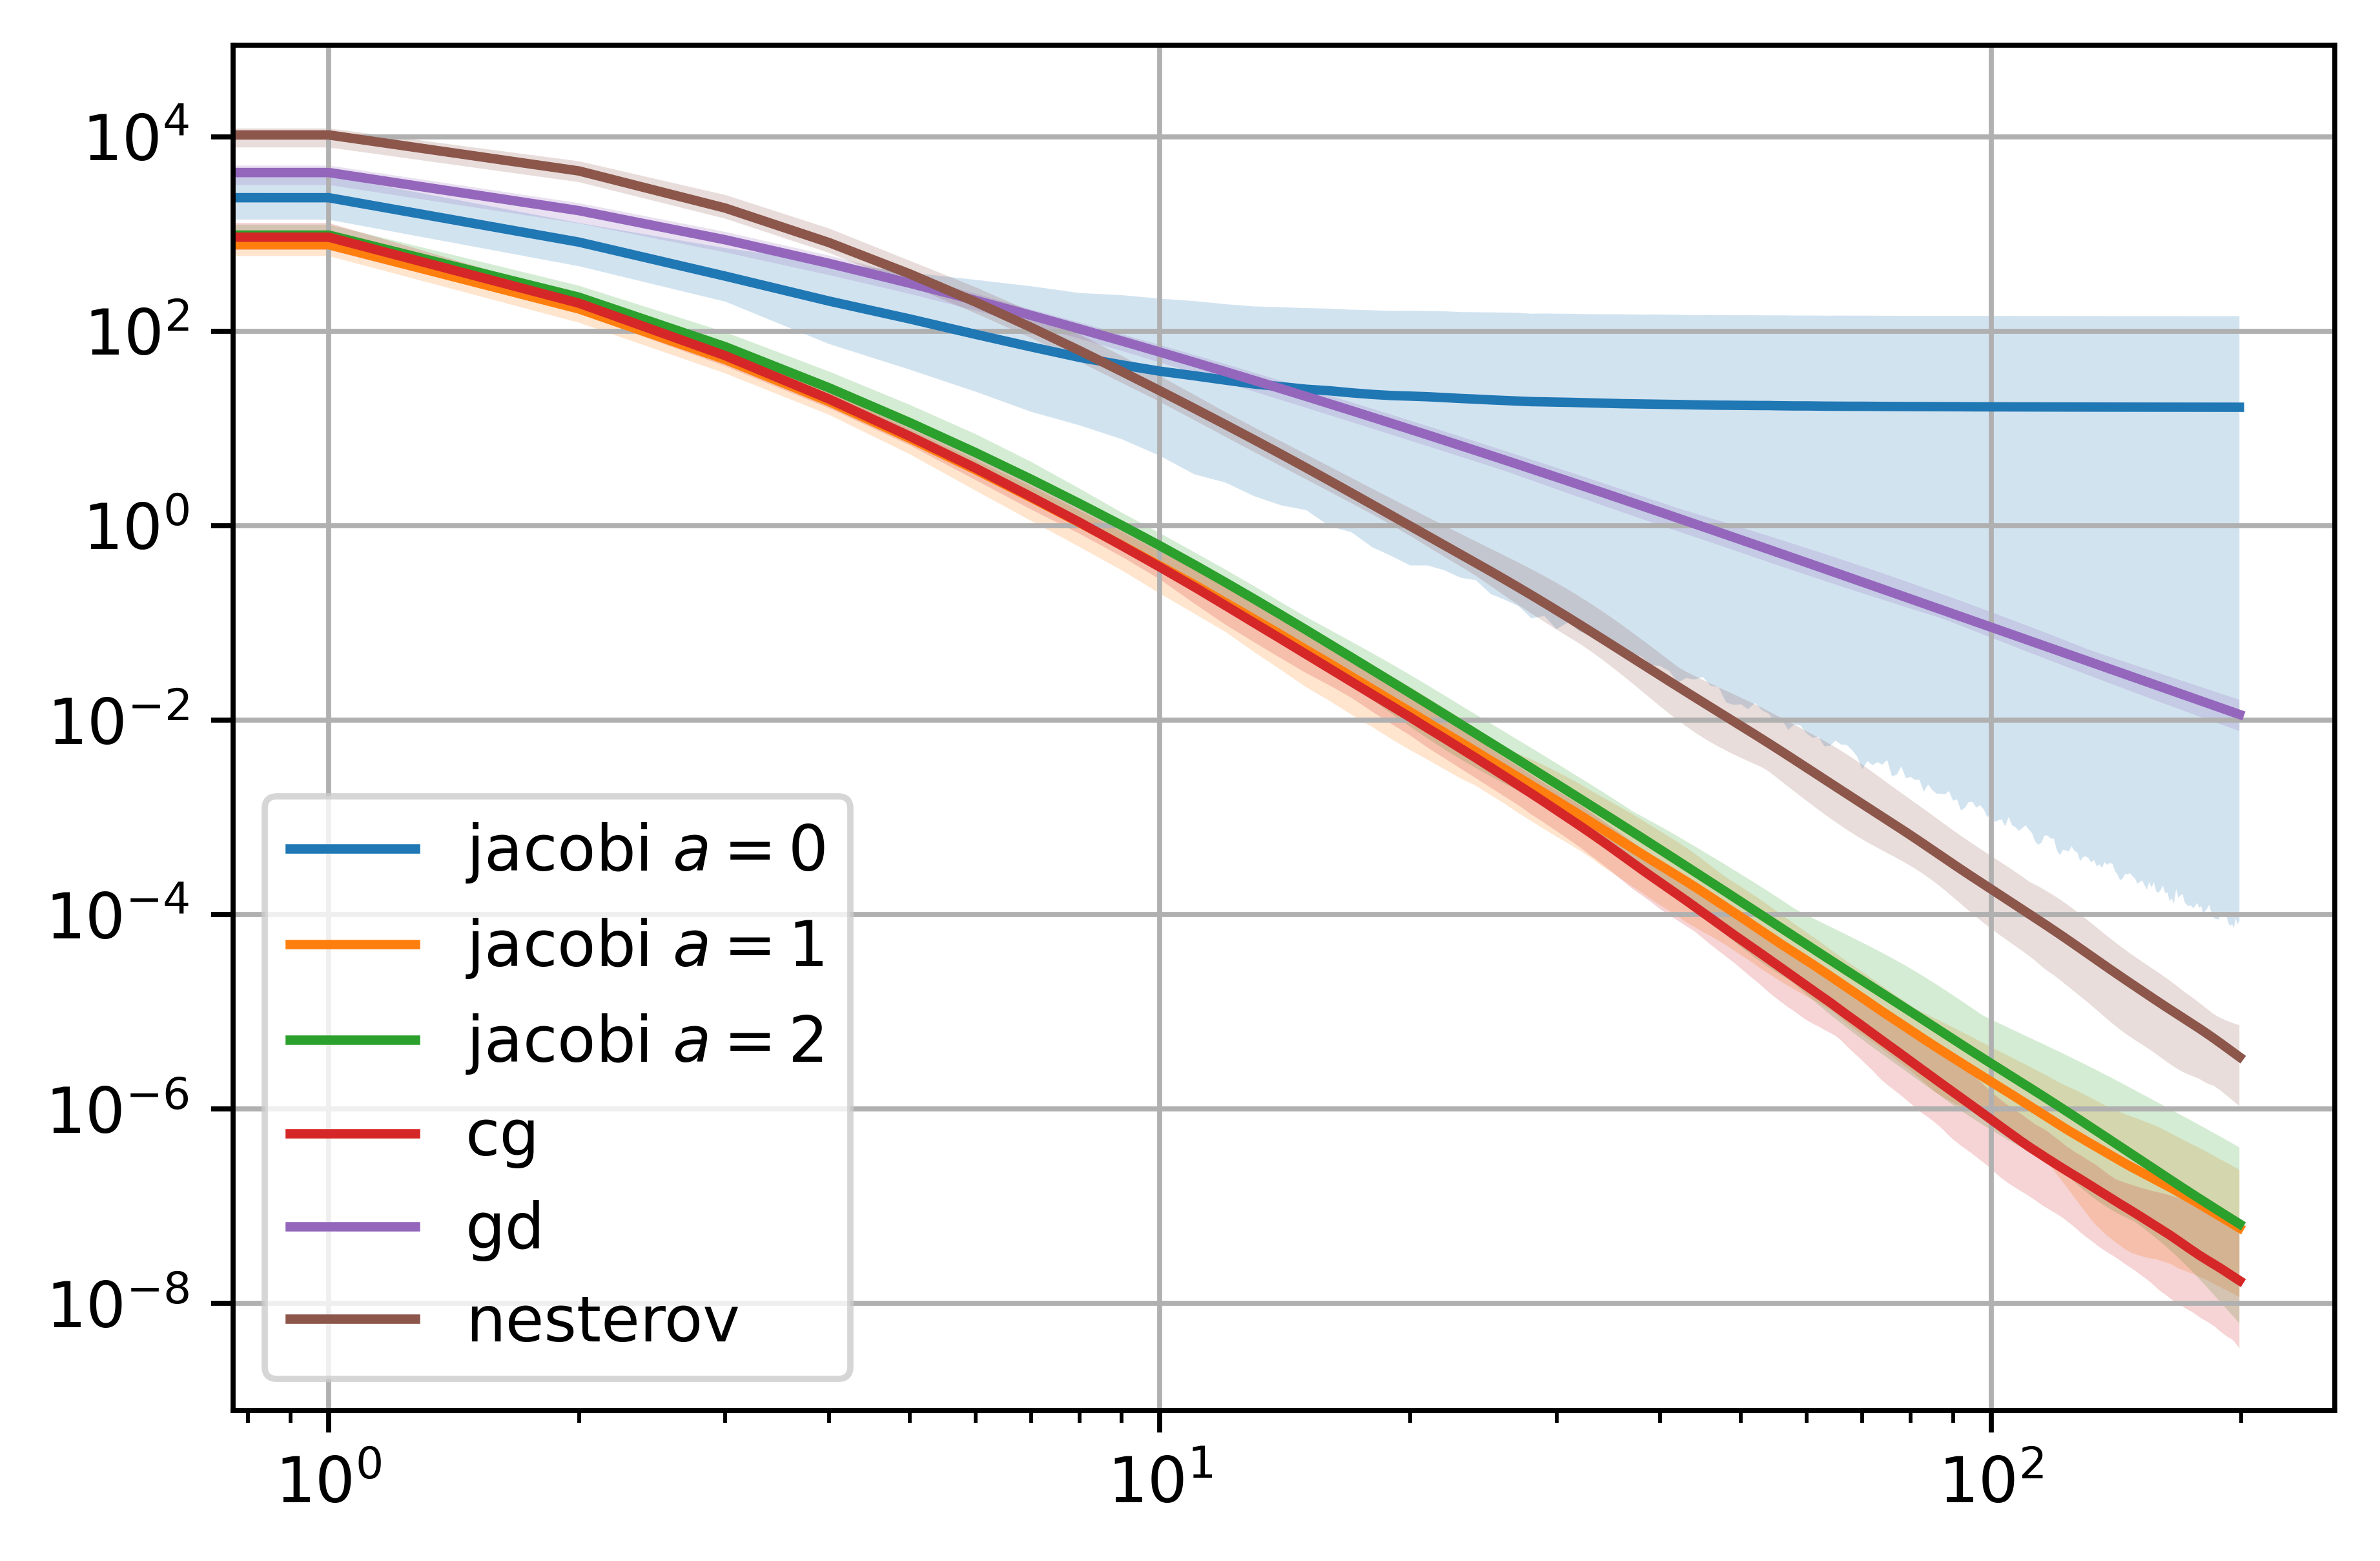

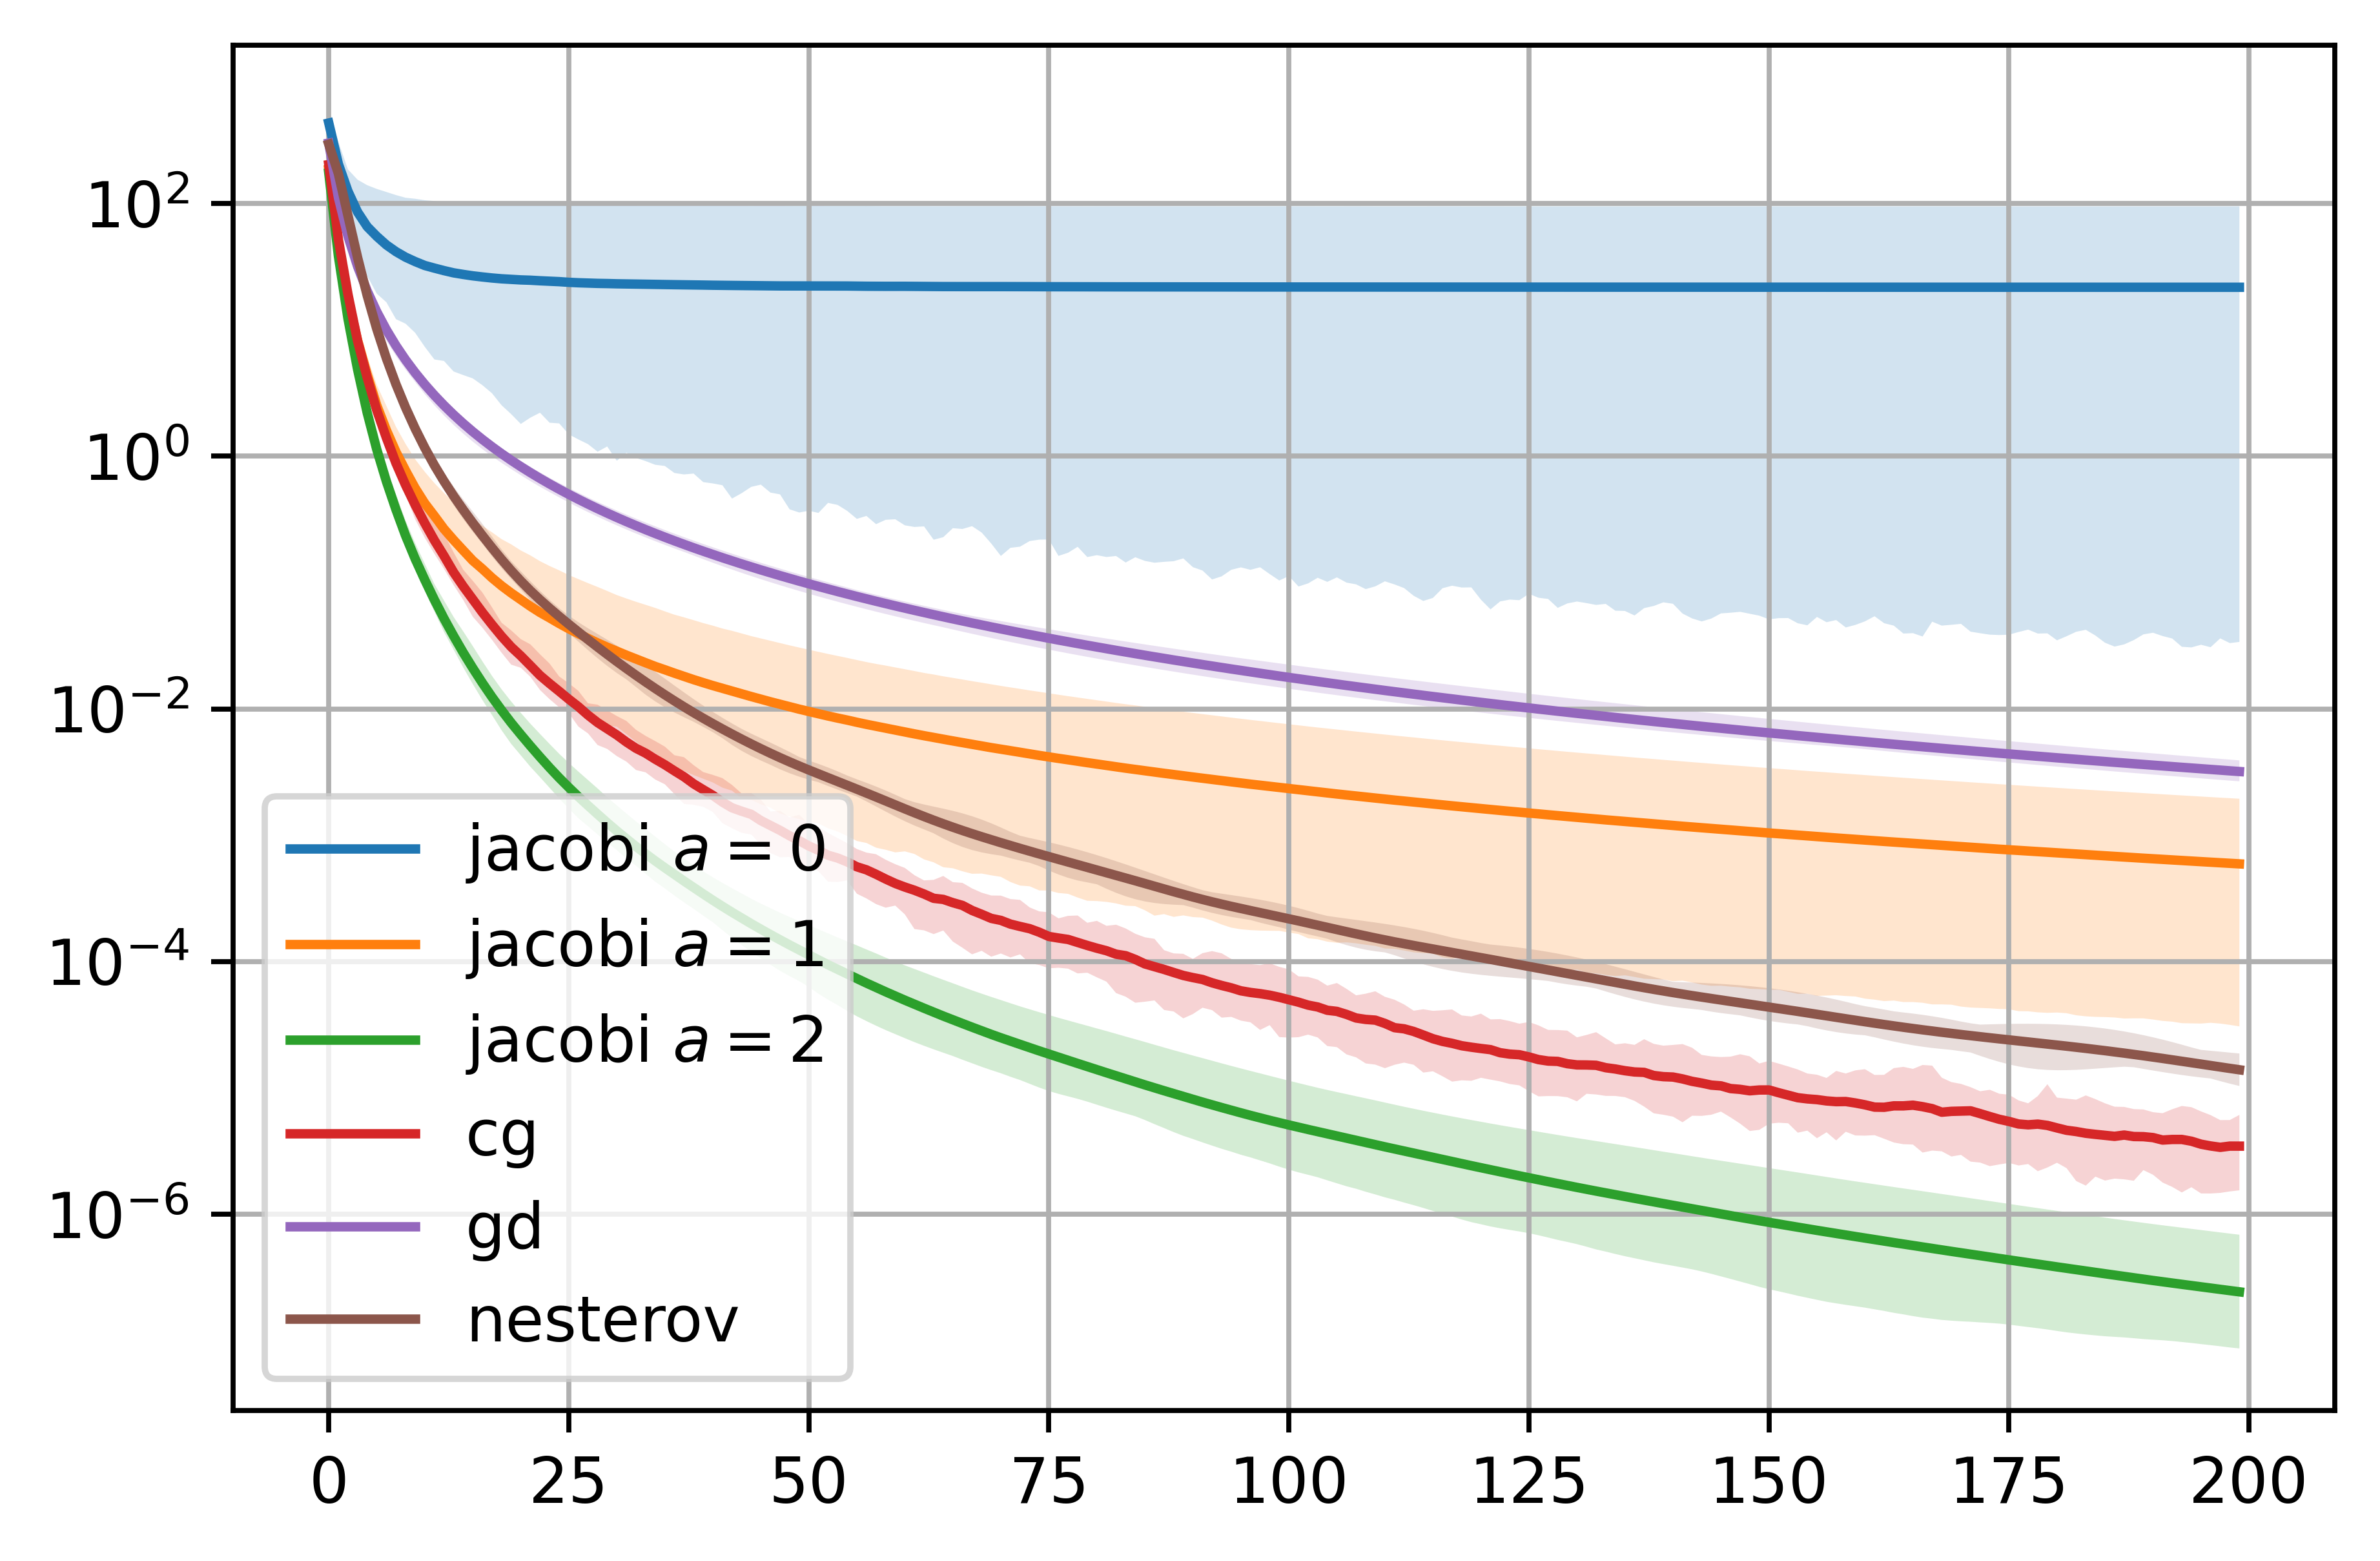

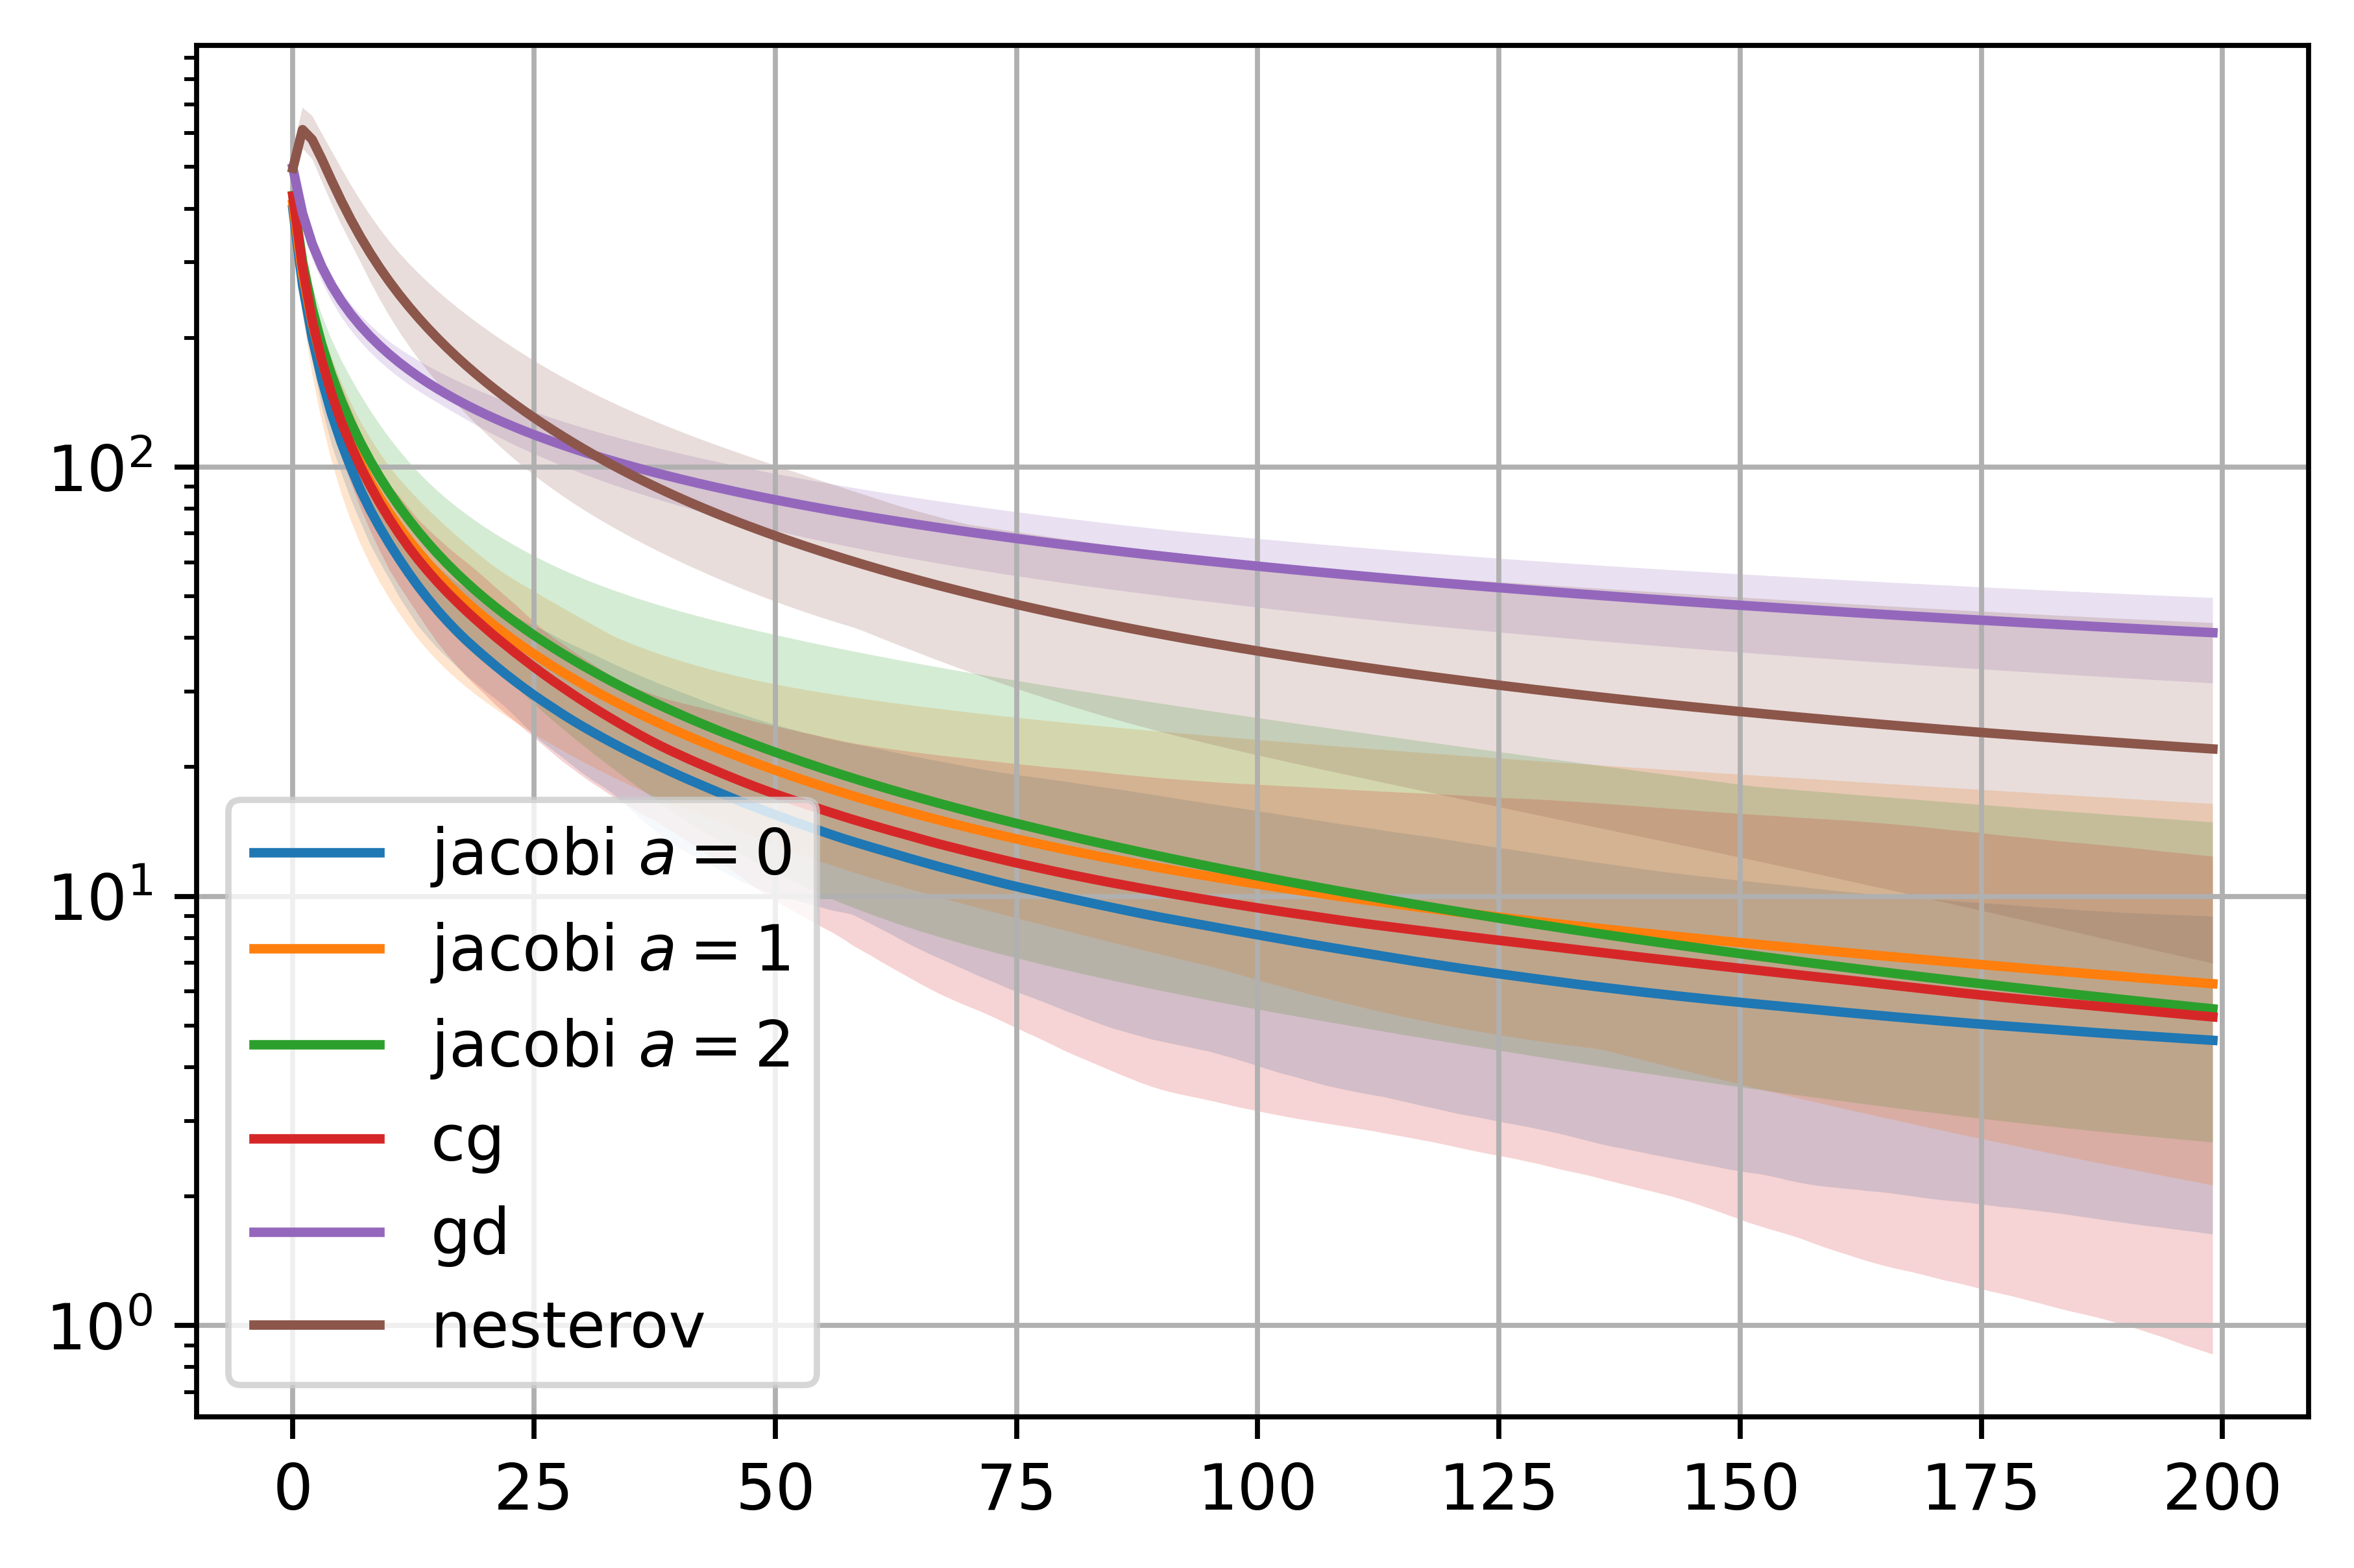

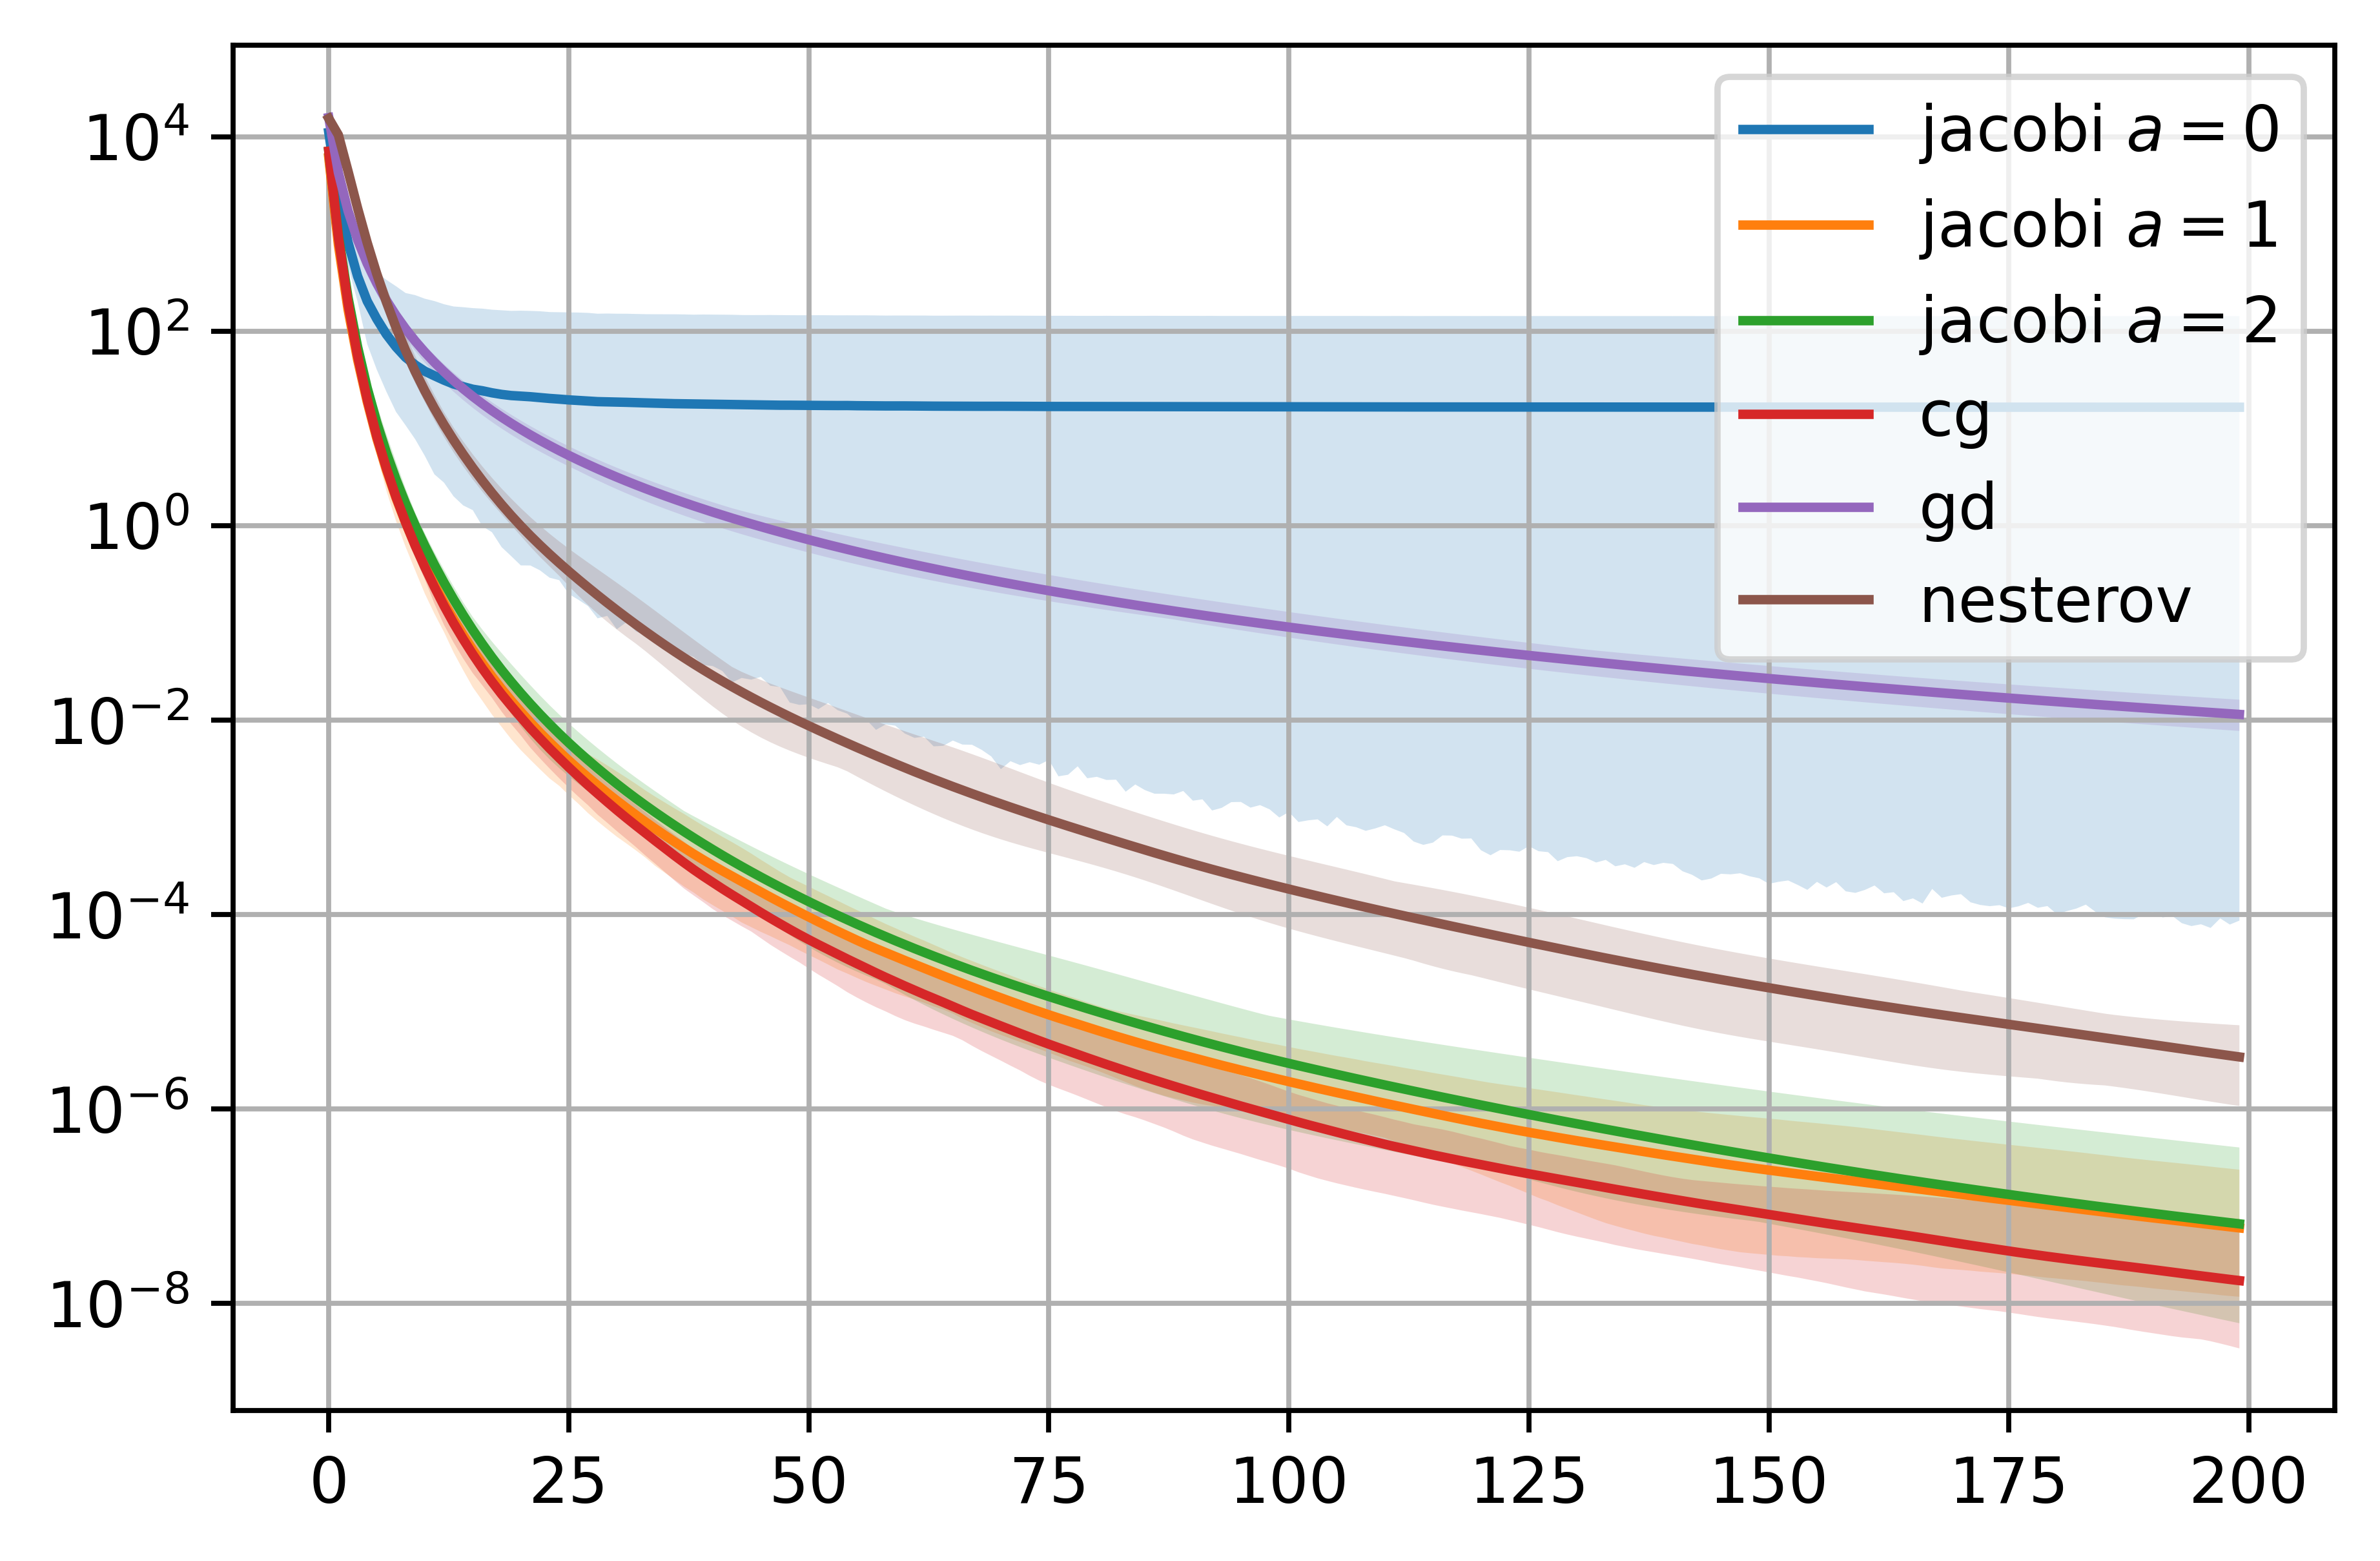

In [26]:
for xlog in [True,False]:
    for log_idx in range(3):

        plt.figure(dpi=700)

        for a, tag in zip(logs,tags):
            #a=np.log10(a)
            plt.fill_between(np.arange(len(m[log_idx])),a.min(0)[log_idx],a.max(0)[log_idx],alpha=0.2)
            plt.plot(m[log_idx],label=tag)
        if xlog:
            plt.xscale('log')
        plt.yscale('log')
        plt.grid()
        plt.legend()

## Fat tails


The jacobi method, $a=1,2$ has shown very good performance on distributions with increasingly fat tails, gamma distributions

## Inception + MNIST Features

In [30]:
from torchvision.datasets import MNIST
import torchvision
dataset=MNIST('data',download=True,transform=torchvision.transforms.ToTensor())

train_data=np.stack([dataset[i][0].view(-1).numpy() for i in range(len(dataset))])
train_y=np.array([dataset[i][1] for i in range(len(dataset))])


(array([264.,  87.,  77.,  77.,  61.,  41.,  28.,  20.,  16.,  12.,  10.,
          8.,   6.,   6.,   6.,   5.,   5.,   3.,   4.,   4.,   2.,   2.,
          4.,   1.,   2.,   2.,   1.,   1.,   3.,   0.,   3.,   0.,   2.,
          1.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([5.86902607e-15, 6.53140259e+00, 1.30628052e+01, 1.95942078e+01,
        2.61256104e+01, 3.26570129e+01, 3.91884155e+01, 4.57198181e+01,
        5.22512207e+01, 5.87826233e+01, 6.53140259e+01, 7.18454285e+01,
        7.83768311e+01, 8.49082336e+01, 9.14396362e+01, 9.79710388e+01,
        1.04502441e+02, 1.1103

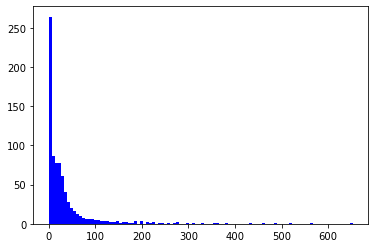

In [31]:
import numpy as np
N=8000
perm=np.random.permutation(np.arange(len(train_data)))
sample=train_data[perm[:N]]
train_y=train_y[perm[:N]]
nsample=(sample-sample.mean(0))/sample.std()
_,evs,_=np.linalg.svd(nsample)
plt.hist(evs,bins=100,color='b')
#_,evs,_=np.linalg.svd(sample)
#plt.hist(evs[evs<100],bins=100,color='r')

In [43]:
def jm_decorator(b=2):
    def  aux(*args,**kwargs):
        return jacobi_momentum(*args,b=b,**kwargs)
    return aux

methods,tags=[jm_decorator(0),jm_decorator(1),jm_decorator(2),cg,gd,nesterov],['jacobi $a=0$','jacobi $a=1$','jacobi $a=2$','cg','gd','nesterov']
logs=[[] for _ in range(len(methods))]
for _ in range(5):
    for m,l in zip(methods,logs):
        f= FeaturesQuadratic(nsample,train_y)
        l.append(m(f,L=f.L)[0].to_numpy()[0])
logs=[np.stack(l) for l in logs]


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:09<00:00, 21.64it/s]
C:\Users\leona\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.56it/s]


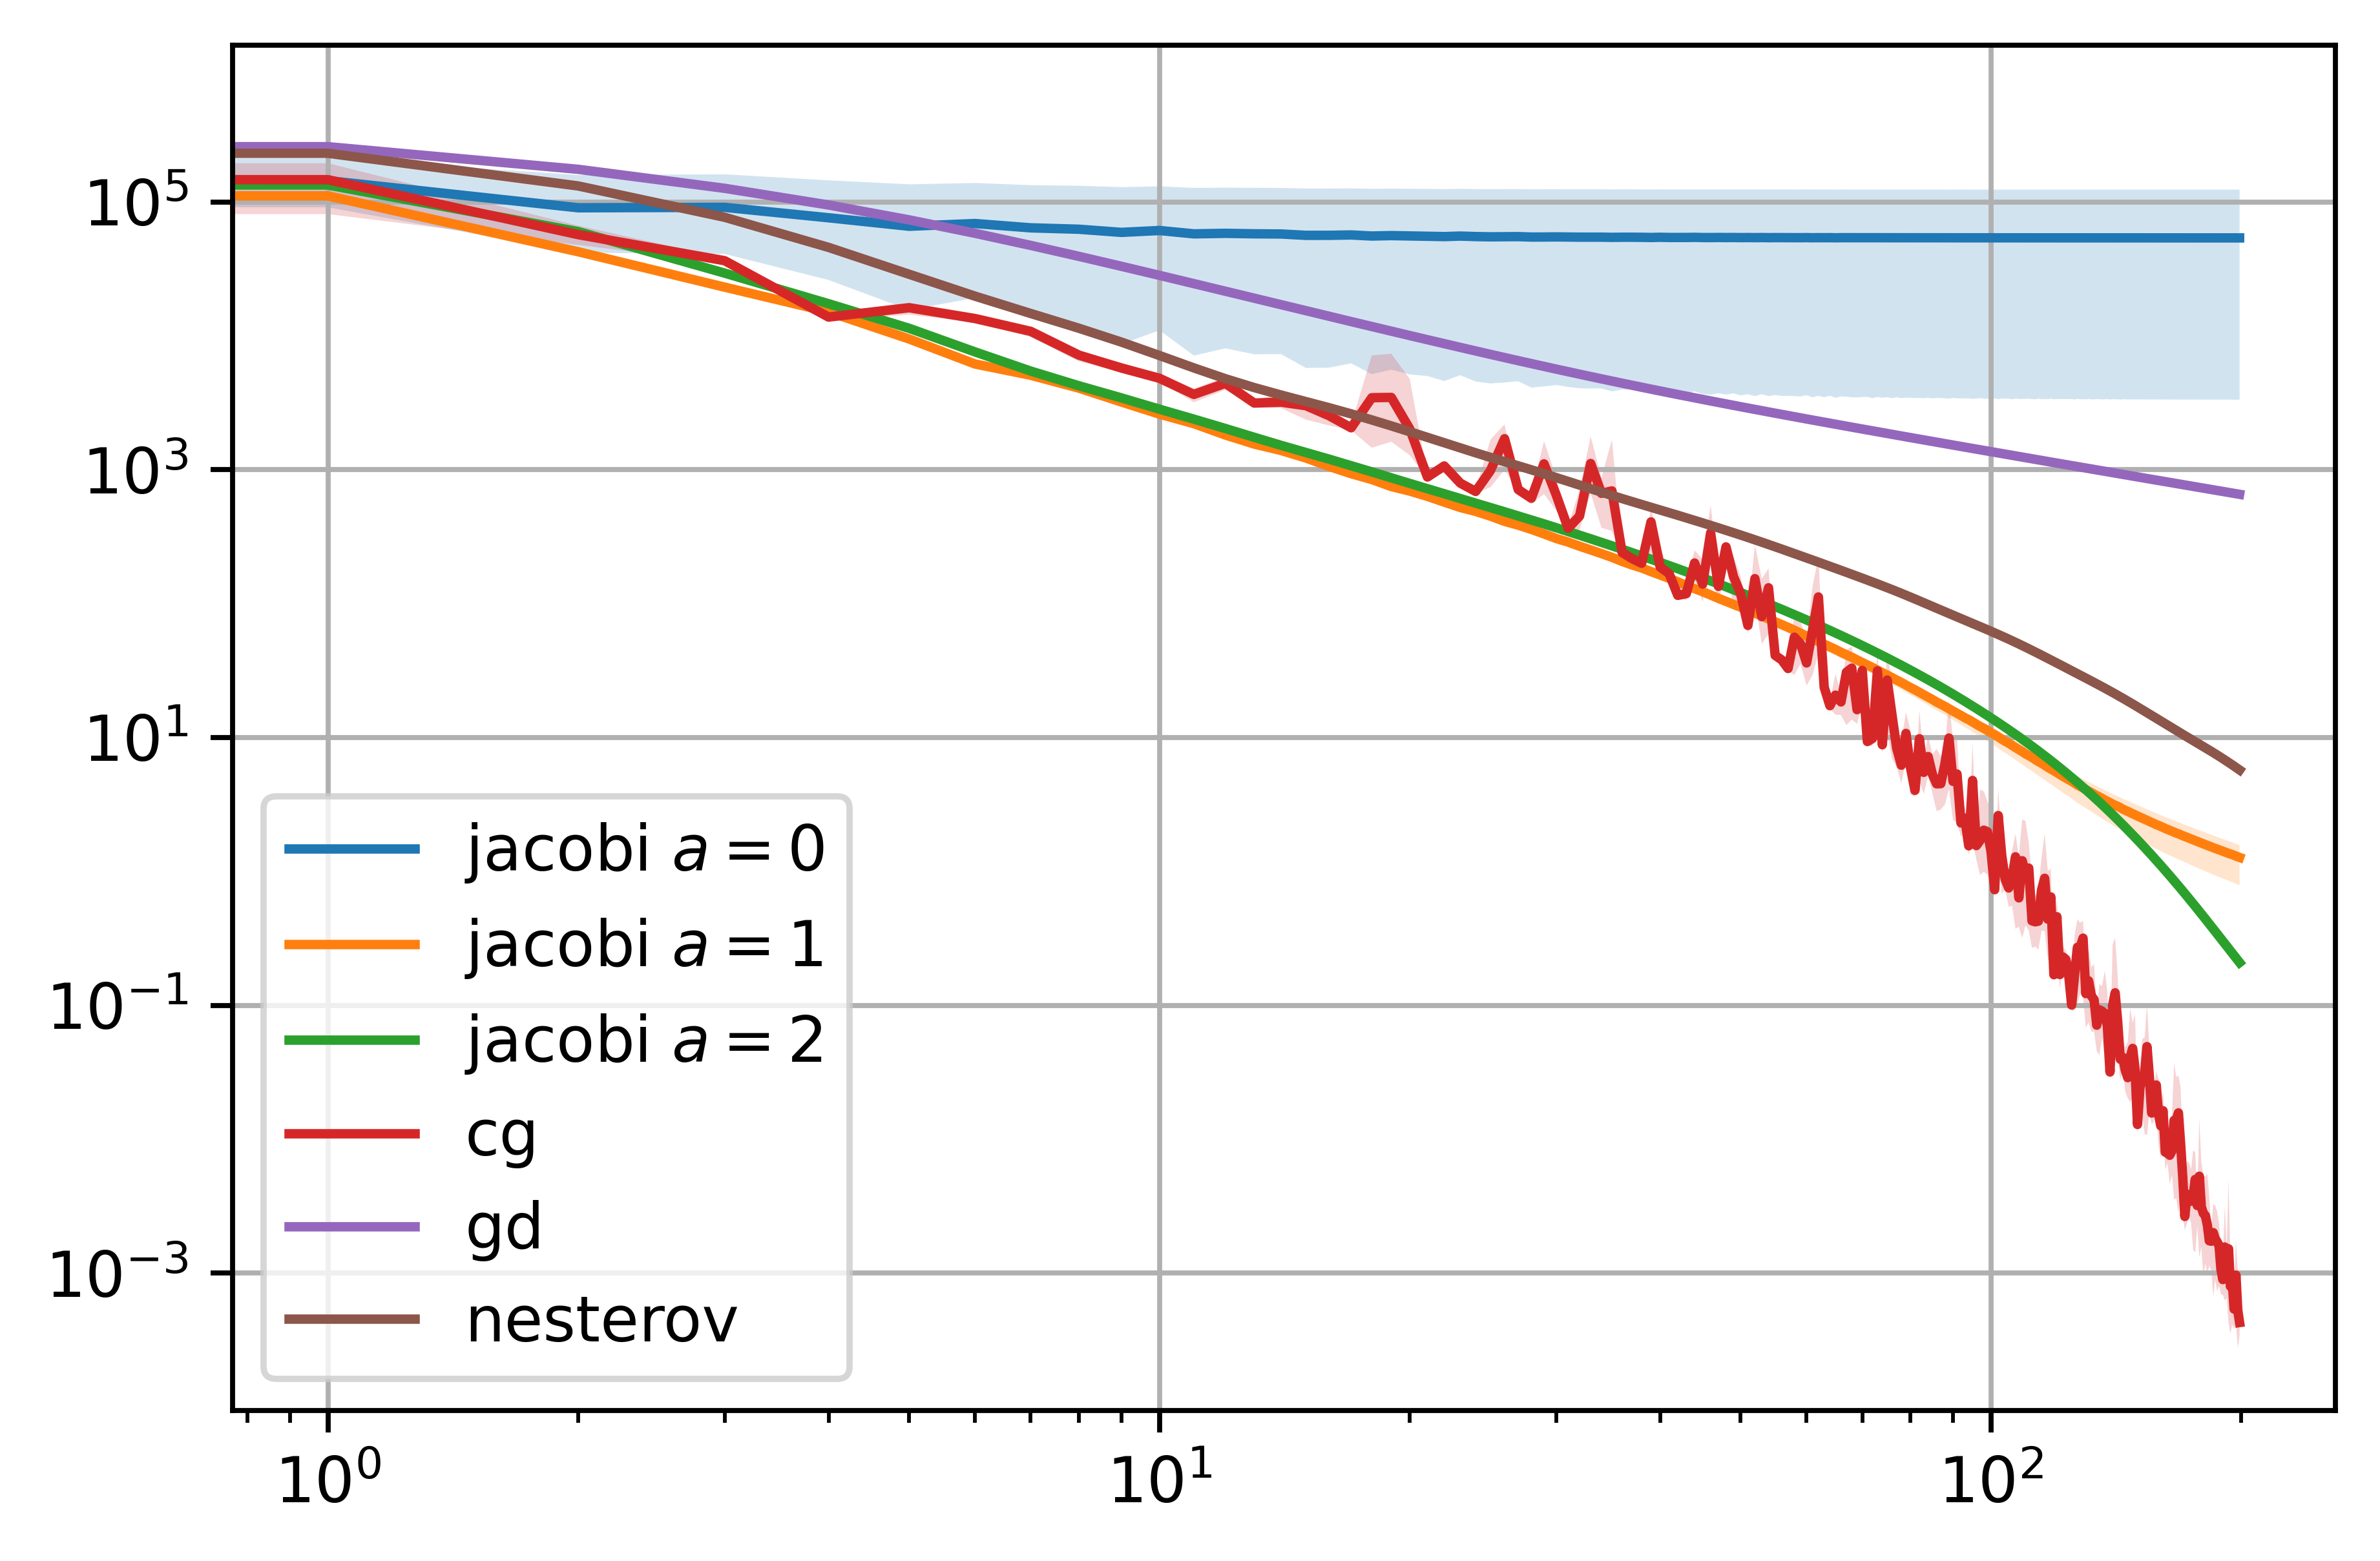

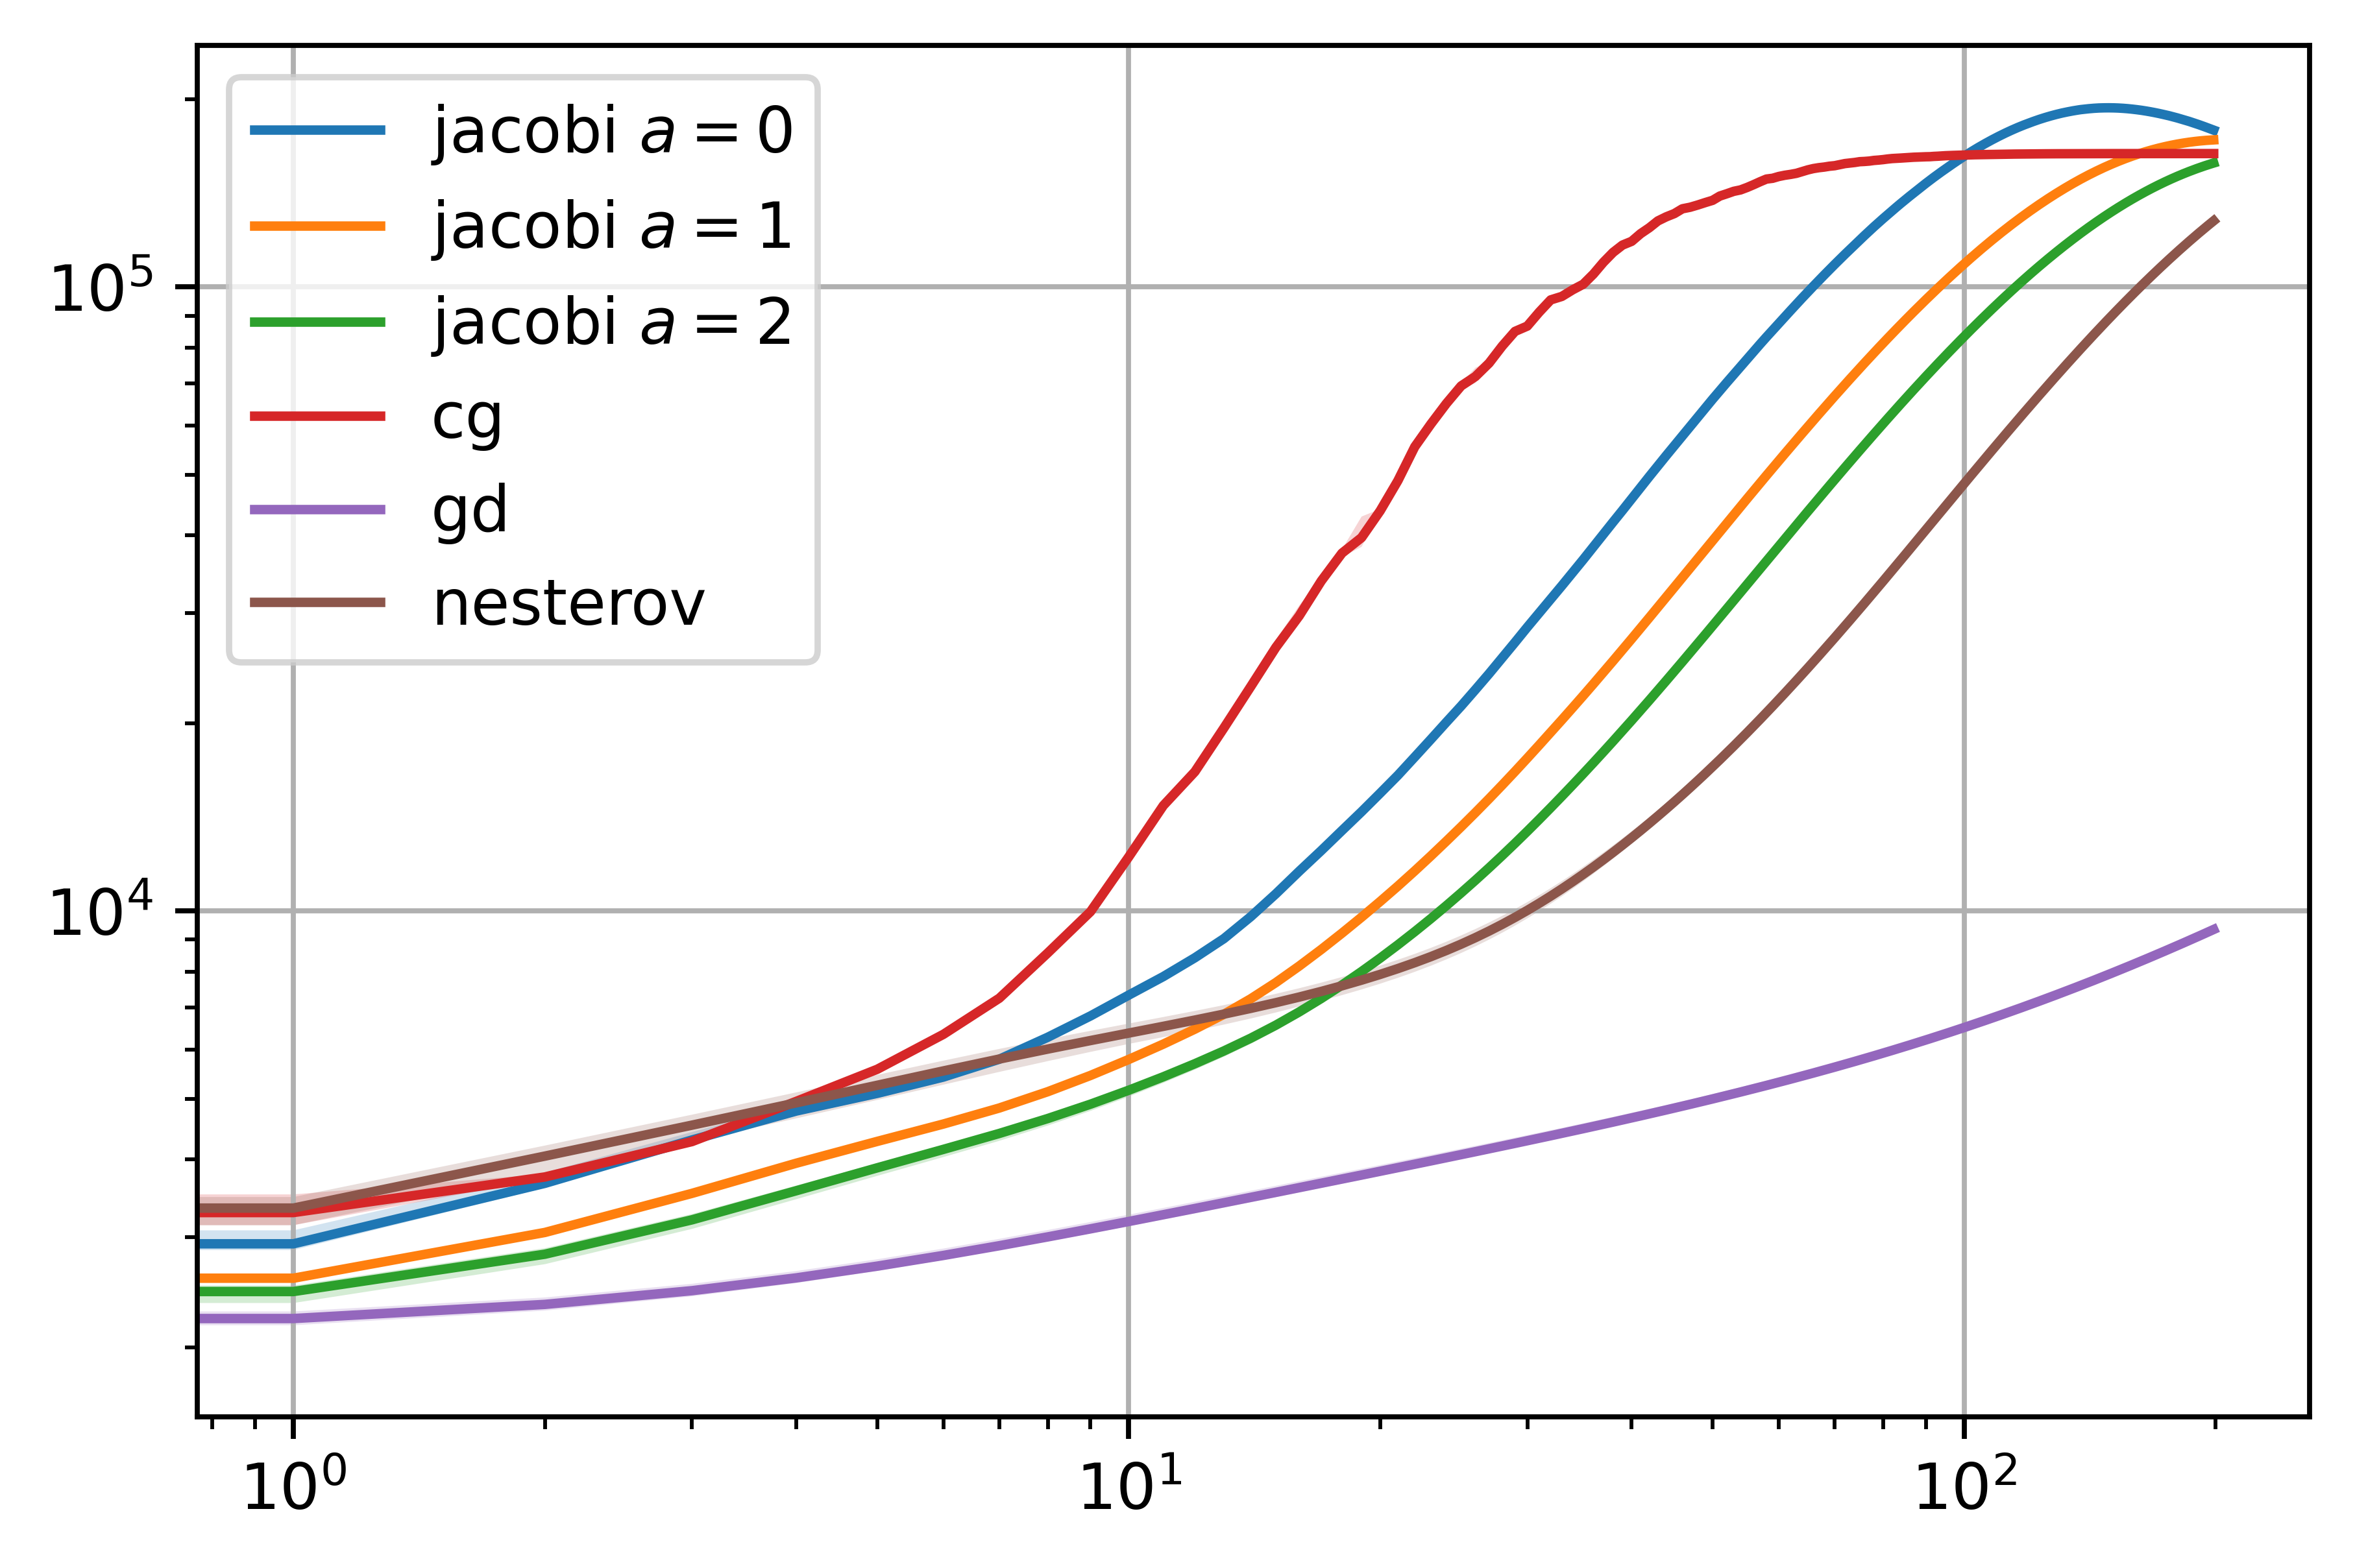

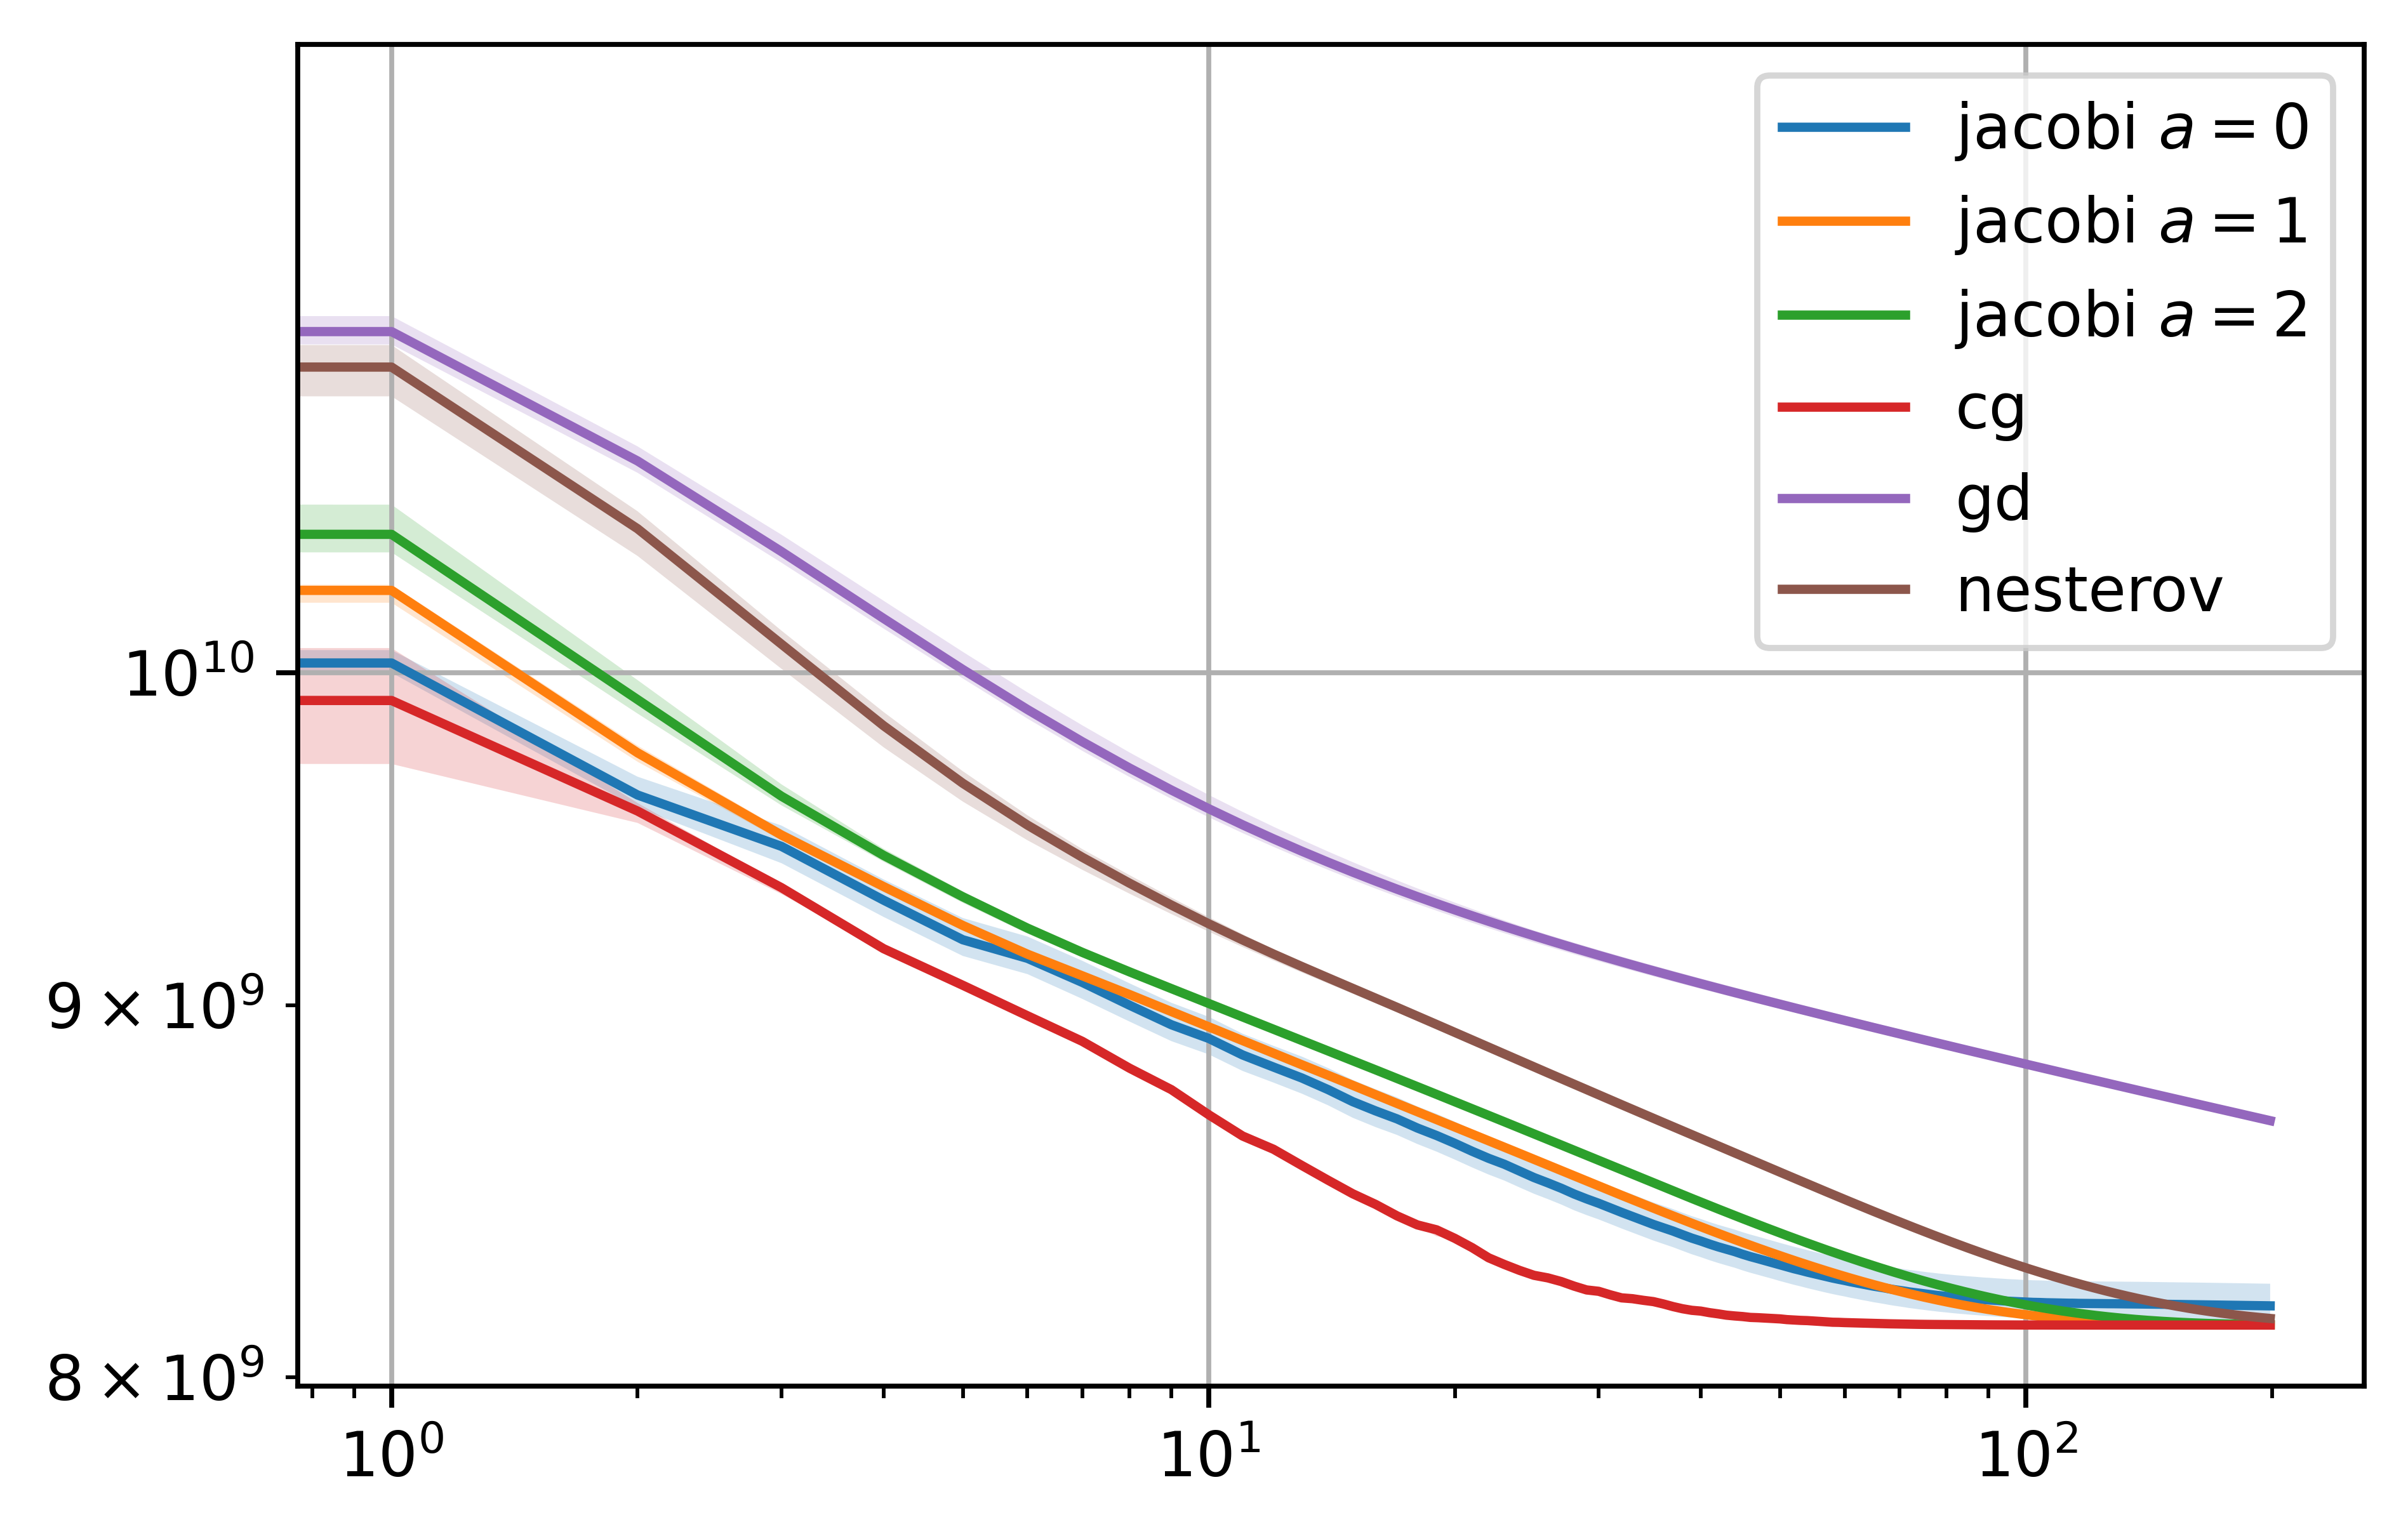

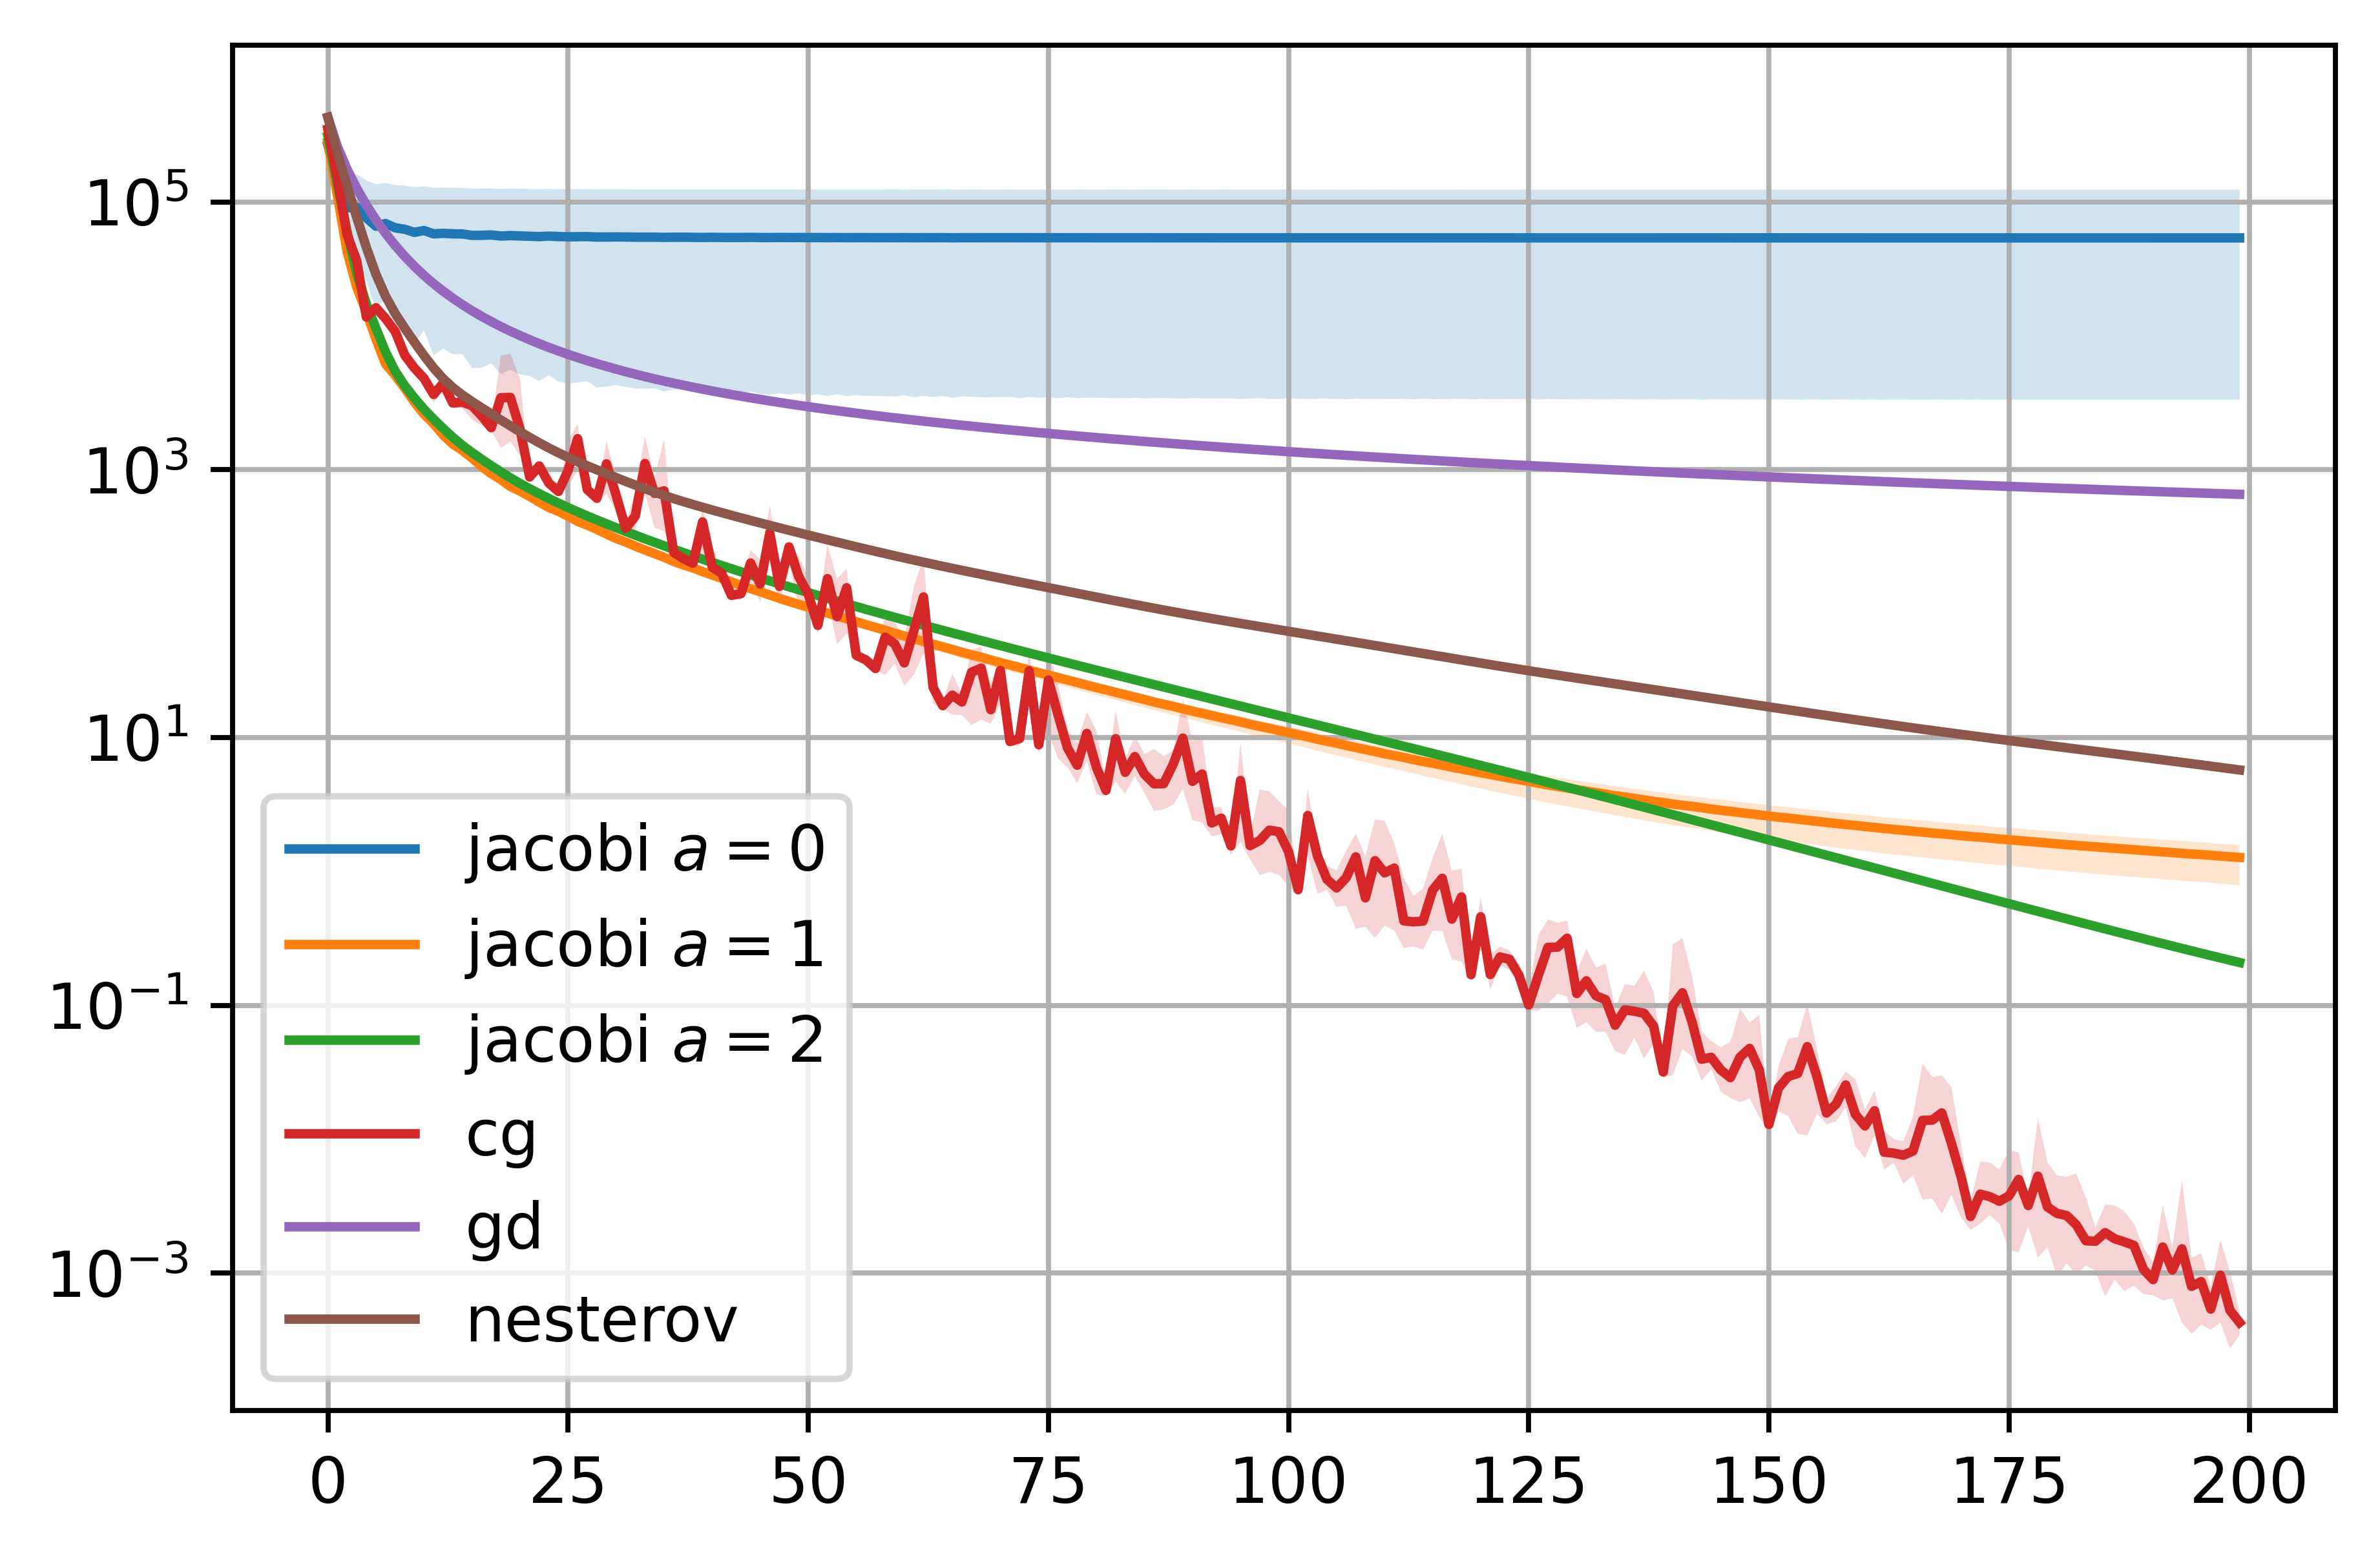

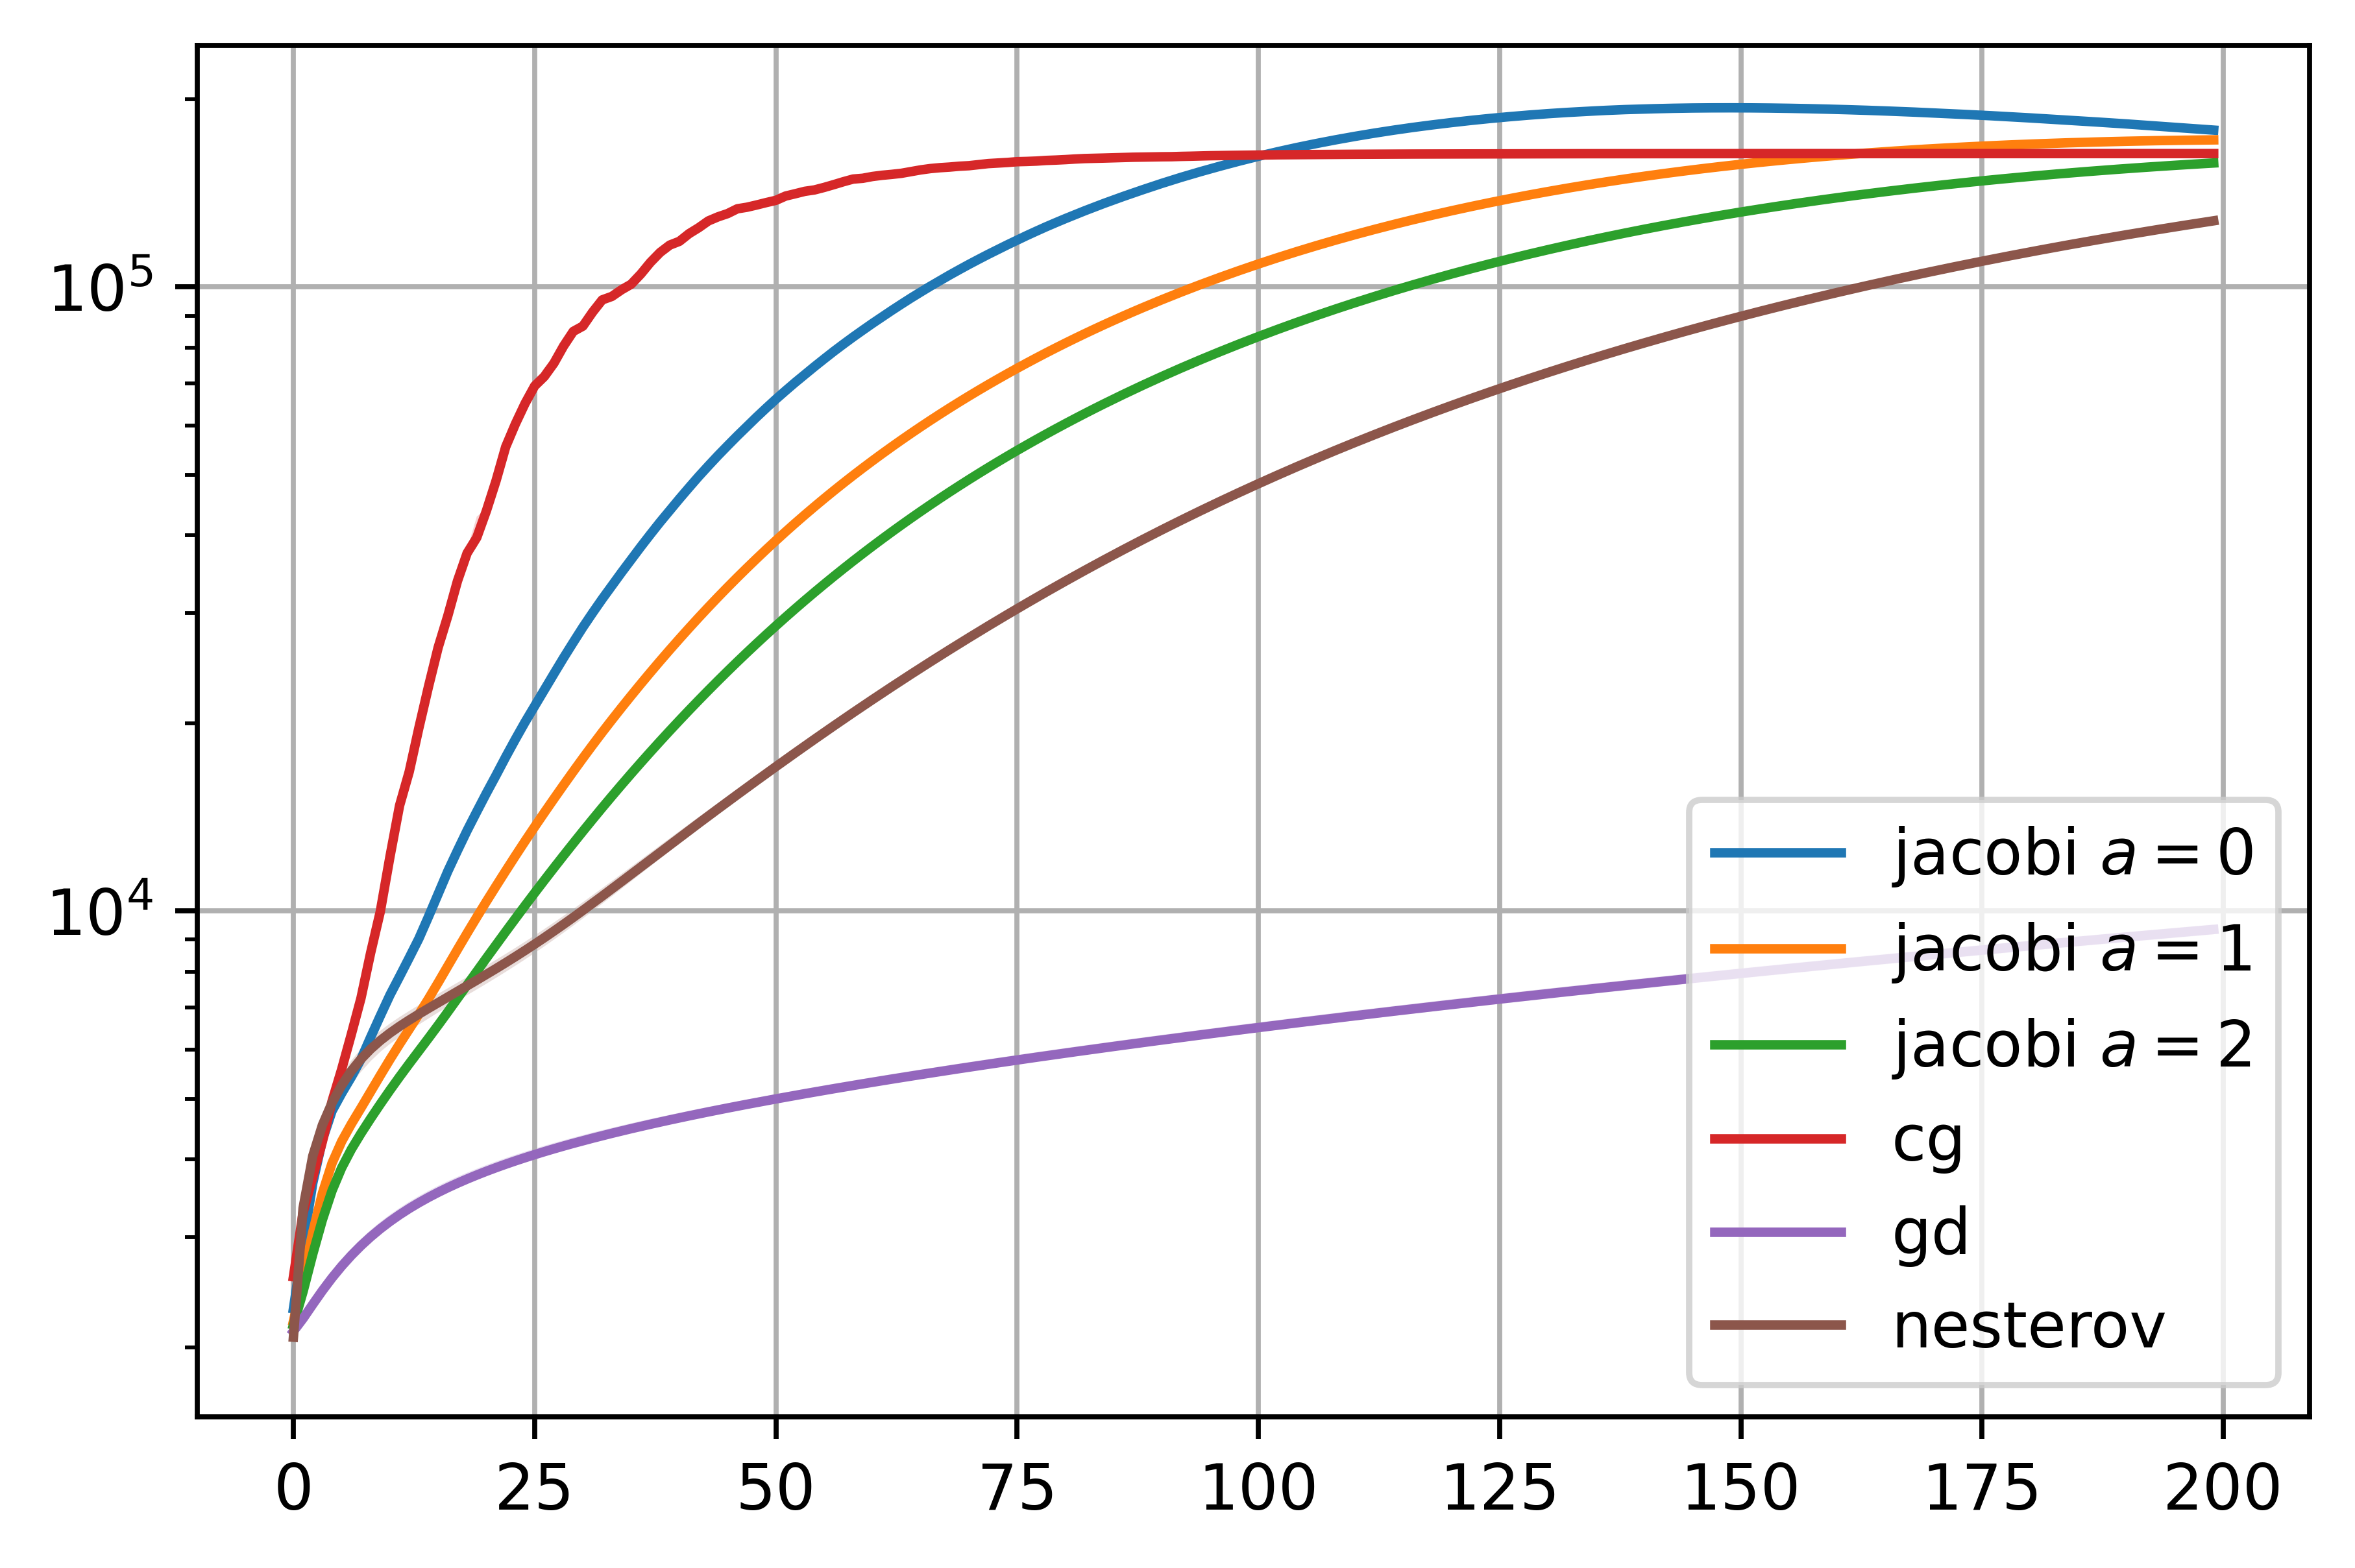

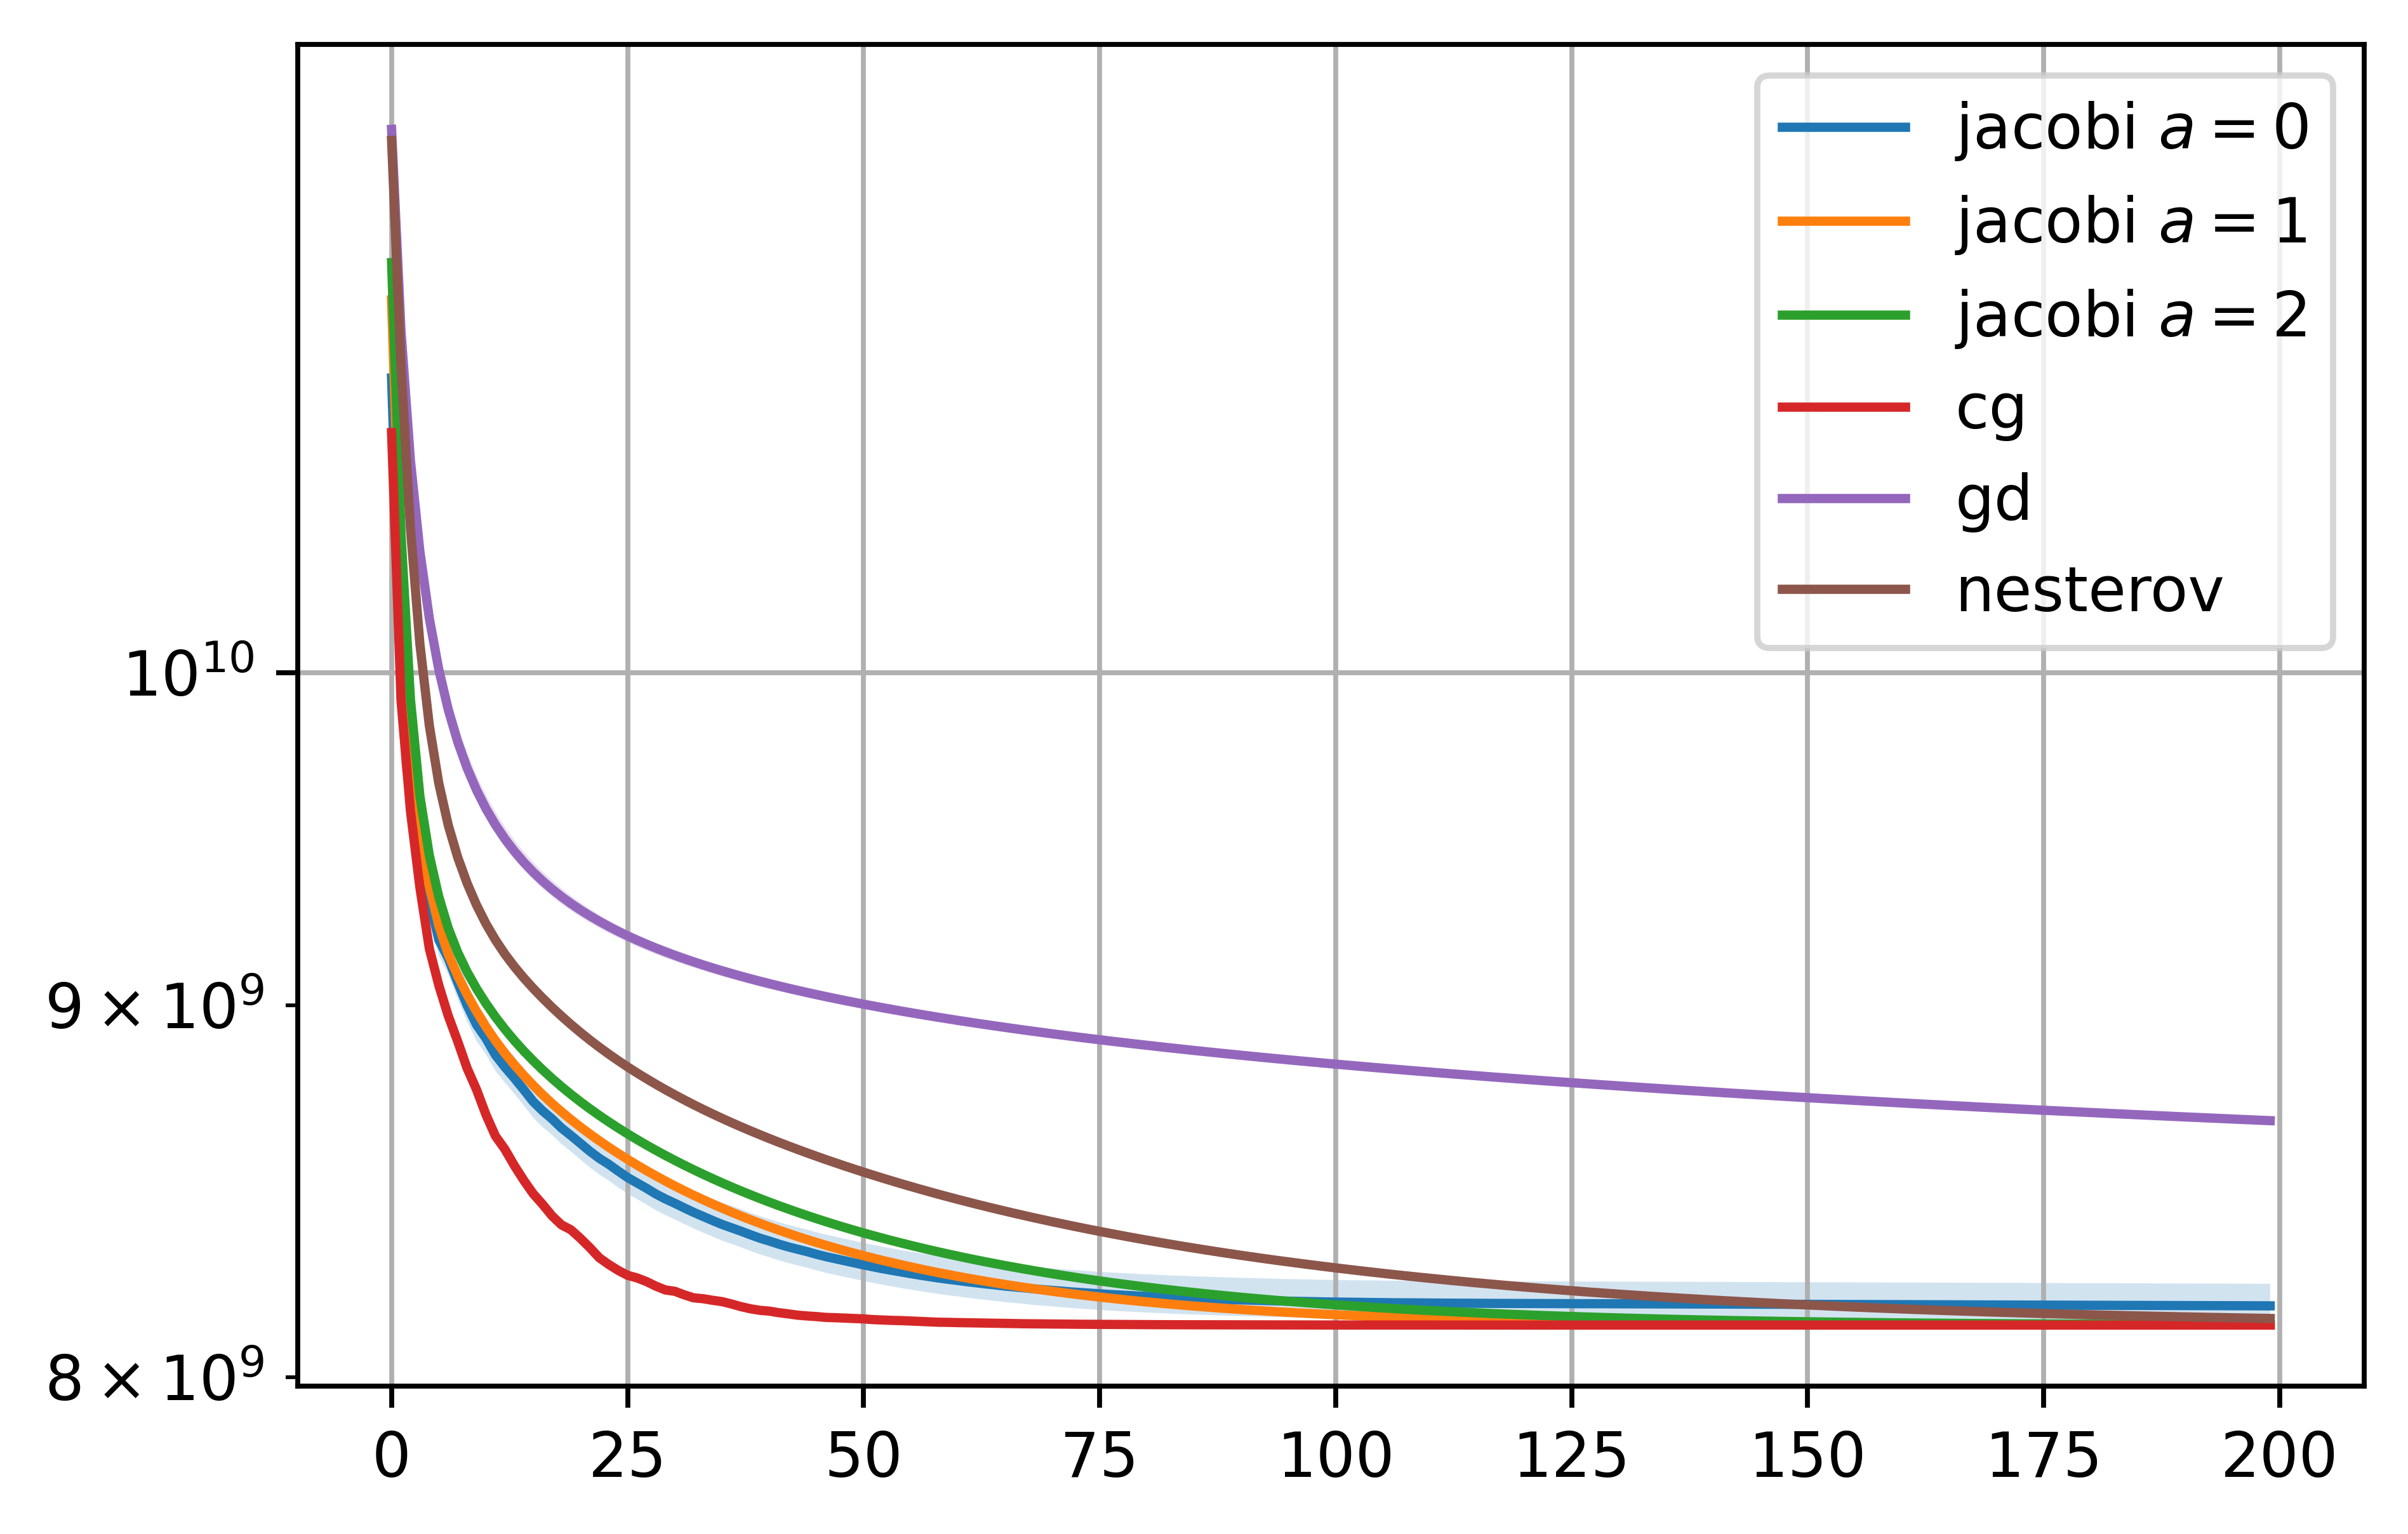

In [44]:
for xlog in [True,False]:
    for log_idx in range(3):

        plt.figure(dpi=700)

        for a, tag in zip(logs,tags):
            #a=np.log10(a)
            m,std=a.mean(0),a.std(0)
            plt.fill_between(np.arange(len(m[log_idx])),a.min(0)[log_idx],a.max(0)[log_idx],alpha=0.2)
            plt.plot(m[log_idx],label=tag)
        if xlog:
            plt.xscale('log')
        plt.yscale('log')
        plt.grid()
        plt.legend()